In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Importing dataframes

In [3]:
path= r'C:\Users\solom\Downloads\Machine Learning- Project'

In [4]:
df_weather = pd.read_csv(os.path.join(path, 'Manipulated Data', 'Weather_updated.csv'))
df_weather

Unnamed: 0      DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  \
0               0  19600101      1                  7            0.85   
1               1  19600102      1                  6            0.84   
2               2  19600103      1                  8            0.90   
3               3  19600104      1                  3            0.92   
4               4  19600105      1                  6            0.95   
...           ...       ...    ...                ...             ...   
22945       22945  20221027     10                  1            0.79   
22946       22946  20221028     10                  6            0.77   
22947       22947  20221029     10                  4            0.76   
22948       22948  20221030     10                  5            0.80   
22949       22949  20221031     10                  5            0.84   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0              1.0180                    0.32                 0.09   
1              1.0180                    0.36                 1.05   
2              1.0180                    0.18                 0.30   
3              1.0180                    0.58                 0.00   
4              1.0180                    0.65                 0.14   
...               ...                     ...                  ...   
22945          1.0248                    1.34                 0.22   
22946          1.0244                    1.34                 0.22   
22947          1.0227                    1.34                 0.22   
22948          1.0212                    1.34                 0.22   
22949          1.0193                    1.34                 0.22   

       BASEL_sunshine  BASEL_temp_mean  ...  STOCKHOLM_temp_max  \
0                 0.7              6.5  ...                 4.9   
1                 1.1              6.1  ...                 5.0   
2                 0.0              8.5  ...                 4.1   
3                 4.1              6.3  ...                 2.3   
4                 5.4              3.0  ...                 4.3   
...               ...              ...  ...                 ...   
22945             7.7             15.9  ...                14.2   
22946             5.4             16.7  ...                14.3   
22947             6.1             16.7  ...                14.4   
22948             5.8             15.4  ...                12.4   
22949             3.2             13.5  ...                12.6   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                         5               0.88             1.0003   
1                         7               0.91             1.0007   
2                         7               0.91             1.0096   
3                         7               0.86             1.0184   
4                         3               0.80             1.0328   
...                     ...                ...                ...   
22945                     5               0.82             1.0142   
22946                     5               0.82             1.0142   
22947                     5               0.82             1.0142   
22948                     5               0.82             1.0142   
22949                     5               0.82             1.0142   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                           0.45                    0.34                4.7   
1                           0.25                    0.84                0.7   
2                           0.17                    0.08                0.1   
3                           0.13                    0.98                0.0   
4                           0.46                    0.00                5.7   
...                          ...                     ...                ...   
22945                       1.13                    0.41                3.4   
22946                  

In [5]:
df_weather.describe()

Unnamed: 0          DATE         MONTH  BASEL_cloud_cover  \
count  22950.000000  2.295000e+04  22950.000000       22950.000000   
mean   11474.500000  1.990984e+07      6.509630           5.410763   
std     6625.238675  1.813833e+05      3.443672           2.406115   
min        0.000000  1.960010e+07      1.000000           0.000000   
25%     5737.250000  1.975092e+07      4.000000           4.000000   
50%    11474.500000  1.991060e+07      7.000000           6.000000   
75%    17211.750000  2.007021e+07      9.000000           7.000000   
max    22949.000000  2.022103e+07     12.000000           8.000000   

       BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
count    22950.000000    22950.000000            22950.000000   
mean         0.758554        1.018013                1.345244   
std          0.110699        0.006543                0.931158   
min          0.350000        0.974700                0.010000   
25%          0.680000        1.015800                0.540000   
50%          0.770000        1.018000                1.130000   
75%          0.840000        1.020100                2.070000   
max          1.000000        1.045200                4.560000   

       BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  ...  \
count         22950.000000    22950.000000     22950.000000  ...   
mean              0.222305        4.592222        10.392471  ...   
std               0.498995        4.310808         7.363575  ...   
min               0.000000        0.000000       -18.500000  ...   
25%               0.000000        0.400000         4.700000  ...   
50%               0.000000        3.600000        10.700000  ...   
75%               0.220000        7.900000        16.200000  ...   
max               8.500000       16.800000        29.200000  ...   

       STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
count        22950.000000          22950.000000       22950.000000   
mean            10.720227              5.723355           0.825824   
std              9.100872              1.630313           0.071121   
min            -22.100000              0.000000           0.380000   
25%              3.400000              5.000000           0.790000   
50%             10.200000              6.000000           0.820000   
75%             18.300000              7.000000           0.870000   
max             35.400000              8.000000           1.000000   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
count       22950.000000               22950.000000            22950.000000   
mean            1.014242                   1.134490                0.414698   
std             0.010727                   0.848813                0.844943   
min             0.955100                   0.020000                0.000000   
25%             1.009400                   0.400000                0.010000   
50%             1.014200                   0.970000                0.280000   
75%             1.020900                   1.700000                0.410000   
max             1.046300                   3.980000               90.000000   

       VALENTIA_sunshine  VALENTIA_temp_mean  VALENTIA_temp_min  \
count       22950.000000        22950.000000       22950.000000   
mean            3.460989           10.724257           7.901904   
std             3.329432            3.328727           3.659393   
min             0.000000           -3.500000          -7.300000   
25%             0.500000            8.800000           6.100000   
50%             3.400000           10.700000           7.900000   
75%             4.800000           13.000000          10.300000   
max            15.800000           23.600000          19.500000   

       VALENTIA_temp_max  
count       22950.000000  
mean           13.515752  
std             3.477373  
min            -1.500000  
25%            11.300000  
50%            13.500000  
75%            15.700000  
max            2

In [6]:
# Drop unnamed column from weather dataset
df_weather = df_weather.drop(columns=['Unnamed: 0'])

In [7]:
df_pleasant = pd.read_csv(os.path.join(path, 'Manipulated Data', 'Pleasant_updated.csv'), index_col = False)
df_pleasant

Unnamed: 0      DATE  BASEL_pleasant_weather  \
0               0  19600101                       0   
1               1  19600102                       0   
2               2  19600103                       0   
3               3  19600104                       0   
4               4  19600105                       0   
...           ...       ...                     ...   
22945       22945  20221027                       0   
22946       22946  20221028                       0   
22947       22947  20221029                       0   
22948       22948  20221030                       0   
22949       22949  20221031                       0   

       BELGRADE_pleasant_weather  BUDAPEST_pleasant_weather  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
...                          ...                        ...   
22945                          0                          0   
22946                          0                          0   
22947                          0                          0   
22948                          0                          0   
22949                          0                          0   

       DEBILT_pleasant_weather  DUSSELDORF_pleasant_weather  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
...                        ...                          ...   
22945                        0                            0   
22946                        0                            0   
22947                        0                            0   
22948                        0                            0   
22949                        0                            0   

       HEATHROW_pleasant_weather  KASSEL_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       LJUBLJANA_pleasant_weather  MAASTRICHT_pleasant_weather  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   
...                           ...                          ...   
22945                           0                            0   
22946                           0                            0   
22947                           0                            0   
22948                           0                            0   
22949                           0                            0   

       MADRID_pleasant_weather  MUNCHENB_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4

In [8]:
# Drop unnamed column from pleasant dataset
df_pleasant = df_pleasant.drop(columns=['Unnamed: 0'])

In [9]:
df_pleasant.describe()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
count  2.295000e+04            22950.000000               22950.000000   
mean   1.990984e+07                0.246797                   0.348235   
std    1.813833e+05                0.431157                   0.476421   
min    1.960010e+07                0.000000                   0.000000   
25%    1.975092e+07                0.000000                   0.000000   
50%    1.991060e+07                0.000000                   0.000000   
75%    2.007021e+07                0.000000                   1.000000   
max    2.022103e+07                1.000000                   1.000000   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
count               22950.000000             22950.000000   
mean                    0.323791                 0.194292   
std                     0.467931                 0.395663   
min                     0.000000                 0.000000   
25%                     0.000000                 0.000000   
50%                     0.000000                 0.000000   
75%                     1.000000                 0.000000   
max                     1.000000                 1.000000   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
count                 22950.000000               22950.000000   
mean                      0.214989                   0.216078   
std                       0.410824                   0.411577   
min                       0.000000                   0.000000   
25%                       0.000000                   0.000000   
50%                       0.000000                   0.000000   
75%                       0.000000                   0.000000   
max                       1.000000                   1.000000   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
count             22950.000000                22950.000000   
mean                  0.164444                    0.277821   
std                   0.370686                    0.447935   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    1.000000   
max                   1.000000                    1.000000   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
count                 22950.000000             22950.000000   
mean                      0.207669                 0.446492   
std                       0.405647                 0.497140   
min                       0.000000                 0.000000   
25%                       0.000000                 0.000000   
50%                       0.000000                 0.000000   
75%                       0.000000                 1.000000   
max                       1.000000                 1.000000   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
count               22950.000000           22950.000000   
mean                    0.207712               0.155948   
std                     0.405679               0.362814   
min                     0.000000               0.000000   
25%                     0.000000               0.000000   
50%                     0.000000               0.000000   
75%                     0.000000               0.000000   
max                     1.000000               1.000000   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
count                     22950.0                22950.000000   
mean                          0.0                    0.169673   
std                           0.0                    0.375354   
min                           0.0                    0.000000   
25%                           0.0                    0.000000   
50%                           0.0                    0.000000   
75%                           0.0                    0.000000   
max                           0.0

## Pre-processing for Random Forest (2000s dataset)

In [11]:
# Filter weather dataset to 2000s
df_2000s = df_weather[df_weather['DATE'].astype(str).str.startswith('200')] 
df_2000s.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
14610  20000101      1                  8            0.89          1.0286   
14611  20000102      1                  8            0.87          1.0318   
14612  20000103      1                  5            0.81          1.0314   
14613  20000104      1                  7            0.79          1.0262   
14614  20000105      1                  5            0.90          1.0246   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
14610                    0.20                 0.03             0.0   
14611                    0.25                 0.00             0.0   
14612                    0.50                 0.00             3.7   
14613                    0.63                 0.35             6.9   
14614                    0.51                 0.07             3.7   

       BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
14610              2.9             1.6  ...                 0.7   
14611              3.6             2.7  ...                 2.0   
14612              2.2             0.1  ...                 2.8   
14613              3.9             0.5  ...                 4.6   
14614              6.0             3.8  ...                 2.9   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
14610                     6               0.89             1.0235   
14611                     8               0.92             1.0177   
14612                     4               0.79             1.0154   
14613                     6               0.76             1.0099   
14614                     7               0.81             0.9957   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
14610                       0.22                    0.10                0.7   
14611                       0.13                    0.42                0.0   
14612                       0.22                    1.05                1.2   
14613                       0.36                    0.34                3.5   
14614                       0.12                    0.33                0.0   

       VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
14610                 6.6                2.1               11.0  
14611                 9.6                7.3               10.6  
14612                 8.6                7.3                9.9  
14613                 8.1                5.0                7.7  
14614                 7.7                4.0               11.3  

[5 rows x 137 columns]

In [12]:
df_2000s.shape

(3653, 137)

In [13]:
# Filter pleasant dataset to 2000s
pleasant_2000s = df_pleasant[df_pleasant['DATE'].astype(str).str.startswith('200')] 
pleasant_2000s.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
14610  20000101                       0                          0   
14611  20000102                       0                          0   
14612  20000103                       0                          0   
14613  20000104                       0                          0   
14614  20000105                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
14610                          0                        0   
14611                          0                        0   
14612                          0                        0   
14613                          0                        0   
14614                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
14610                            0                          0   
14611                            0                          0   
14612                            0                          0   
14613                            0                          0   
14614                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
14610                        0                           0   
14611                        0                           0   
14612                        0                           0   
14613                        0                           0   
14614                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
14610                            0                        0   
14611                            0                        0   
14612                            0                        0   
14613                            0                        0   
14614                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
14610                          0                      0   
14611                          0                      0   
14612                          0                      0   
14613                          0                      0   
14614                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
14610                           0                           0   
14611                           0                           0   
14612                           0                           0   
14613                           0                           0   
14614                           0                           0   

       VALENTIA_pleasant_weather  
14610                          0  
14611                          0  
14612                          0  
14613                          0  
14614                          0

In [14]:
pleasant_2000s.shape

(3653, 16)

In [15]:
# Drop 'DATE' and 'MONTH' columns from 2000s weather dataset
df_2000s = df_2000s.drop(columns=['DATE', 'MONTH'])

# Check shape
df_2000s.shape

(3653, 135)

In [16]:
# Drop 'DATE' column from 2000s pleasant dataset
pleasant_2000s = pleasant_2000s.drop(columns=['DATE'])

# Check shape
pleasant_2000s.shape

(3653, 15)

In [17]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_1 = pleasant_2000s.max(axis=1)
print("Shape of y_1_combined:", y_1.shape)

Shape of y_1_combined: (3653,)


In [18]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_1_combined:", y_1.unique())

Unique values in y_1_combined: [0 1]


In [19]:
# Ensure y has the correct shape
y_1 = y_1.to_numpy().reshape(-1)

In [20]:
# Check shape
y_1.shape

(3653,)

In [21]:
# Create X matrix
X_1 = df_2000s.to_numpy()

In [22]:
# Check shapes
print(X_1.shape)
print(y_1.shape)

(3653, 135)
(3653,)


In [23]:
# Split data into training and testing sets

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=127)

In [24]:
# Check shapes
print(X_train_1.shape, y_train_1.shape)
print(X_test_1.shape, y_test_1.shape)

(2739, 135) (2739,)
(914, 135) (914,)


[Text(0.6134868421052632, 0.9375, 'x[89] <= 17.85\ngini = 0.473\nsamples = 2739\nvalue = [1049, 1690]'),
 Text(0.4375, 0.8125, 'x[17] <= 17.95\ngini = 0.293\nsamples = 1253\nvalue = [1030, 223]'),
 Text(0.28289473684210525, 0.6875, 'x[62] <= 14.9\ngini = 0.068\nsamples = 1020\nvalue = [984, 36]'),
 Text(0.17105263157894737, 0.5625, 'x[26] <= 16.25\ngini = 0.02\nsamples = 986\nvalue = [976, 10]'),
 Text(0.10526315789473684, 0.4375, 'x[8] <= 16.75\ngini = 0.01\nsamples = 977\nvalue = [972, 5]'),
 Text(0.05263157894736842, 0.3125, 'x[54] <= 18.2\ngini = 0.002\nsamples = 967\nvalue = [966, 1]'),
 Text(0.02631578947368421, 0.1875, 'gini = 0.0\nsamples = 966\nvalue = [966, 0]'),
 Text(0.07894736842105263, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15789473684210525, 0.3125, 'x[105] <= 3.05\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.13157894736842105, 0.1875, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.18421052631578946, 0.1875, 'gini = 0.0\nsamples = 6\nva

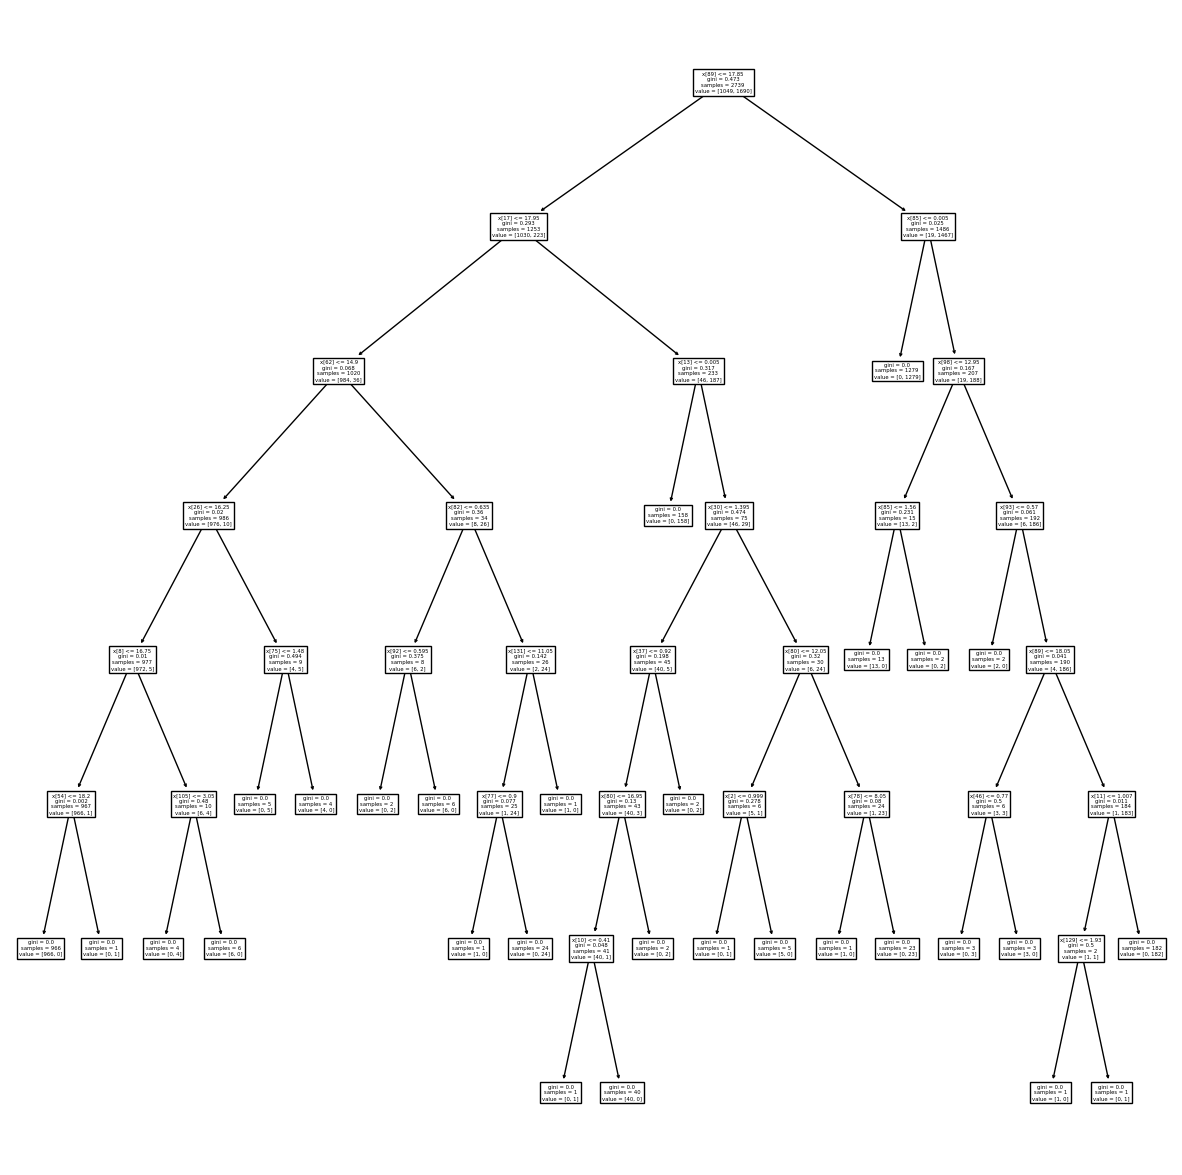

In [25]:
#Run Decision Tree classifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier

weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_train_1, y_train_1)
plt.figure(figsize=(15, 15))
tree.plot_tree(weather_dt)

In [26]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = weather_dt.predict(X_train_1)
print('Train accuracy score: ',cross_val_score(weather_dt, X_train_1, y_train_1, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.9751734209565535


## Pre-processing for Random Forest (2010s dataset)

In [28]:
# Filter weather dataset to 2010s
df_2010s = df_weather[df_weather['DATE'].astype(str).str.startswith('201')] 
df_2010s.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263  20100101      1                  8            0.93          0.9965   
18264  20100102      1                  3            0.74          1.0193   
18265  20100103      1                  3            0.75          1.0226   
18266  20100104      1                  5            0.83          1.0169   
18267  20100105      1                  7            0.78          1.0073   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   
18264                    0.58                 0.00             5.2   
18265                    0.61                 0.00             6.3   
18266                    0.48                 0.00             3.7   
18267                    0.53                 0.04             4.4   

       BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
18263              2.9            -0.2  ...                -7.0   
18264             -1.5            -4.2  ...                -7.1   
18265             -3.2            -6.0  ...                -7.1   
18266             -4.9            -8.3  ...                -3.6   
18267             -4.0            -7.1  ...                -5.5   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
18263                     1               0.80             1.0121   
18264                     1               0.82             1.0196   
18265                     4               0.71             1.0196   
18266                     2               0.67             1.0219   
18267                     4               0.78             1.0117   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
18263                       0.43                    0.00                6.0   
18264                       0.45                    0.00                6.0   
18265                       0.36                    0.41                1.6   
18266                       0.48                    0.51                6.5   
18267                       0.45                    0.09                4.7   

       VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
18263                 1.7               -1.6                5.0  
18264                 0.8               -4.5                6.2  
18265                 0.5               -4.1                5.1  
18266                 3.7                1.3                3.8  
18267                 2.3               -0.7                5.4  

[5 rows x 137 columns]

In [29]:
df_2010s.shape

(3652, 137)

In [30]:
# Filter pleasant dataset to 2010s
pleasant_2010s = df_pleasant[df_pleasant['DATE'].astype(str).str.startswith('201')] 
pleasant_2010s.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   
18264  20100102                       0                          0   
18265  20100103                       0                          0   
18266  20100104                       0                          0   
18267  20100105                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0                      0   
18265                          0                      0   
18266                          0                      0   
18267                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
18263                           0                           0   
18264                           0                           0   
18265                           0                           0   
18266                           0                           0   
18267                           0                           0   

       VALENTIA_pleasant_weather  
18263                          0  
18264                          0  
18265                          0  
18266                          0  
18267                          0

In [31]:
pleasant_2010s.shape

(3652, 16)

In [32]:
# Drop 'DATE' and 'MONTH' columns from 2010s weather dataset
df_2010s = df_2010s.drop(columns=['DATE', 'MONTH'])

# Check shape
df_2010s.shape

(3652, 135)

In [33]:
# Drop 'DATE' column from 2010s pleasant dataset
pleasant_2010s = pleasant_2010s.drop(columns=['DATE'])

# Check shape
pleasant_2010s.shape

(3652, 15)

In [34]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_2 = pleasant_2010s.max(axis=1)
print("Shape of y_2_combined:", y_2.shape)

Shape of y_2_combined: (3652,)


In [35]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_2_combined:", y_2.unique())

Unique values in y_2_combined: [0 1]


In [36]:
# Ensure y has the correct shape
y_2 = y_2.to_numpy().reshape(-1)

In [37]:
# Check shape
y_2.shape

(3652,)

In [38]:
# Create X matrix
X_2 = df_2010s.to_numpy()

In [39]:
# Check shapes
print(X_2.shape)
print(y_2.shape)

(3652, 135)
(3652,)


In [40]:
# Split data into training and testing sets

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=127)

In [41]:
# Check shapes
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

(2739, 135) (2739,)
(913, 135) (913,)


## Random Forest

## 2000s dataset

In [44]:
# Creating a Random Forest classifier
clf_1 = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_1.fit(X_train_1, y_train_1)

RandomForestClassifier(max_depth=10)

In [45]:
# Perform the predictions on the test dataset
y_pred_1 = clf_1.predict(X_test_1)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_1, y_pred_1))

Model Accuracy:  0.9617067833698031


In [46]:
# Check unique values in y
unique_classes = np.unique(y_1)
print(unique_classes)
print(len(unique_classes)) 

[0 1]
2


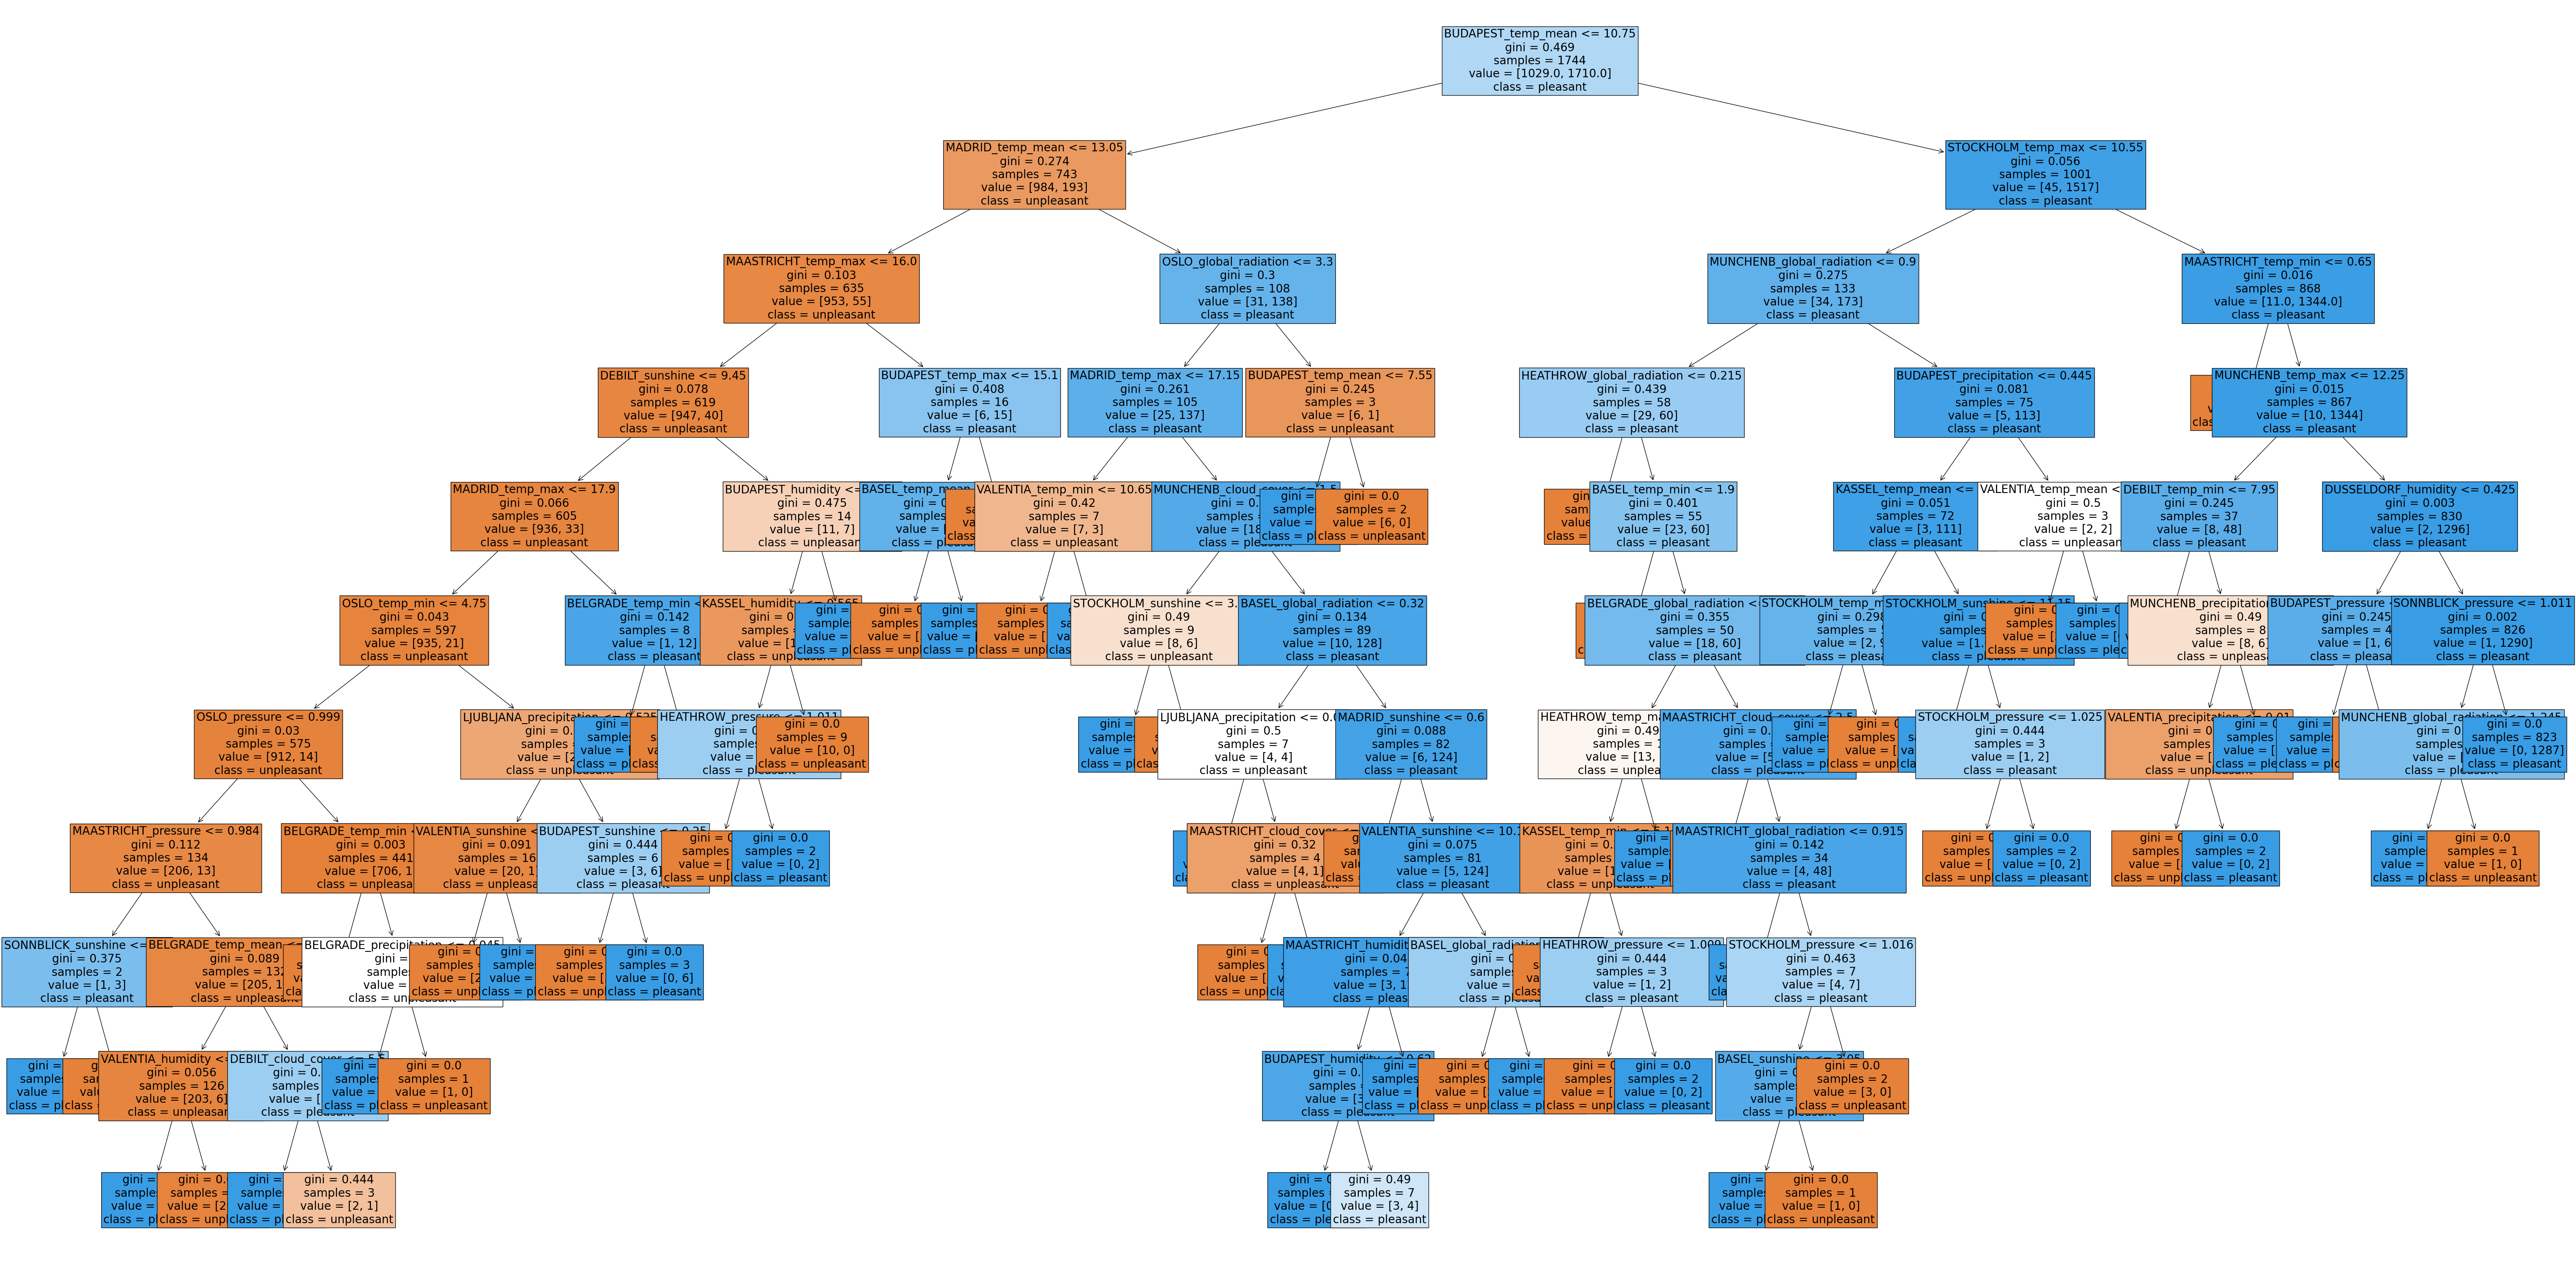

In [47]:
# Plot random forest (2000s)
rf_1 = plt.figure(figsize=(80,40))
plot_tree(clf_1.estimators_[5], fontsize = 20, feature_names=df_2000s.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [48]:
rf_1.savefig(os.path.join(path,'Visualization', 'RF_2000s.png'))

## 2010s dataset

In [50]:
# Creating a Random Forest classifier
clf_2 = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_2.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=10)

In [51]:
# Perform the predictions on the test dataset
y_pred_2 = clf_2.predict(X_test_2)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_2, y_pred_2))

Model Accuracy:  0.976998904709748


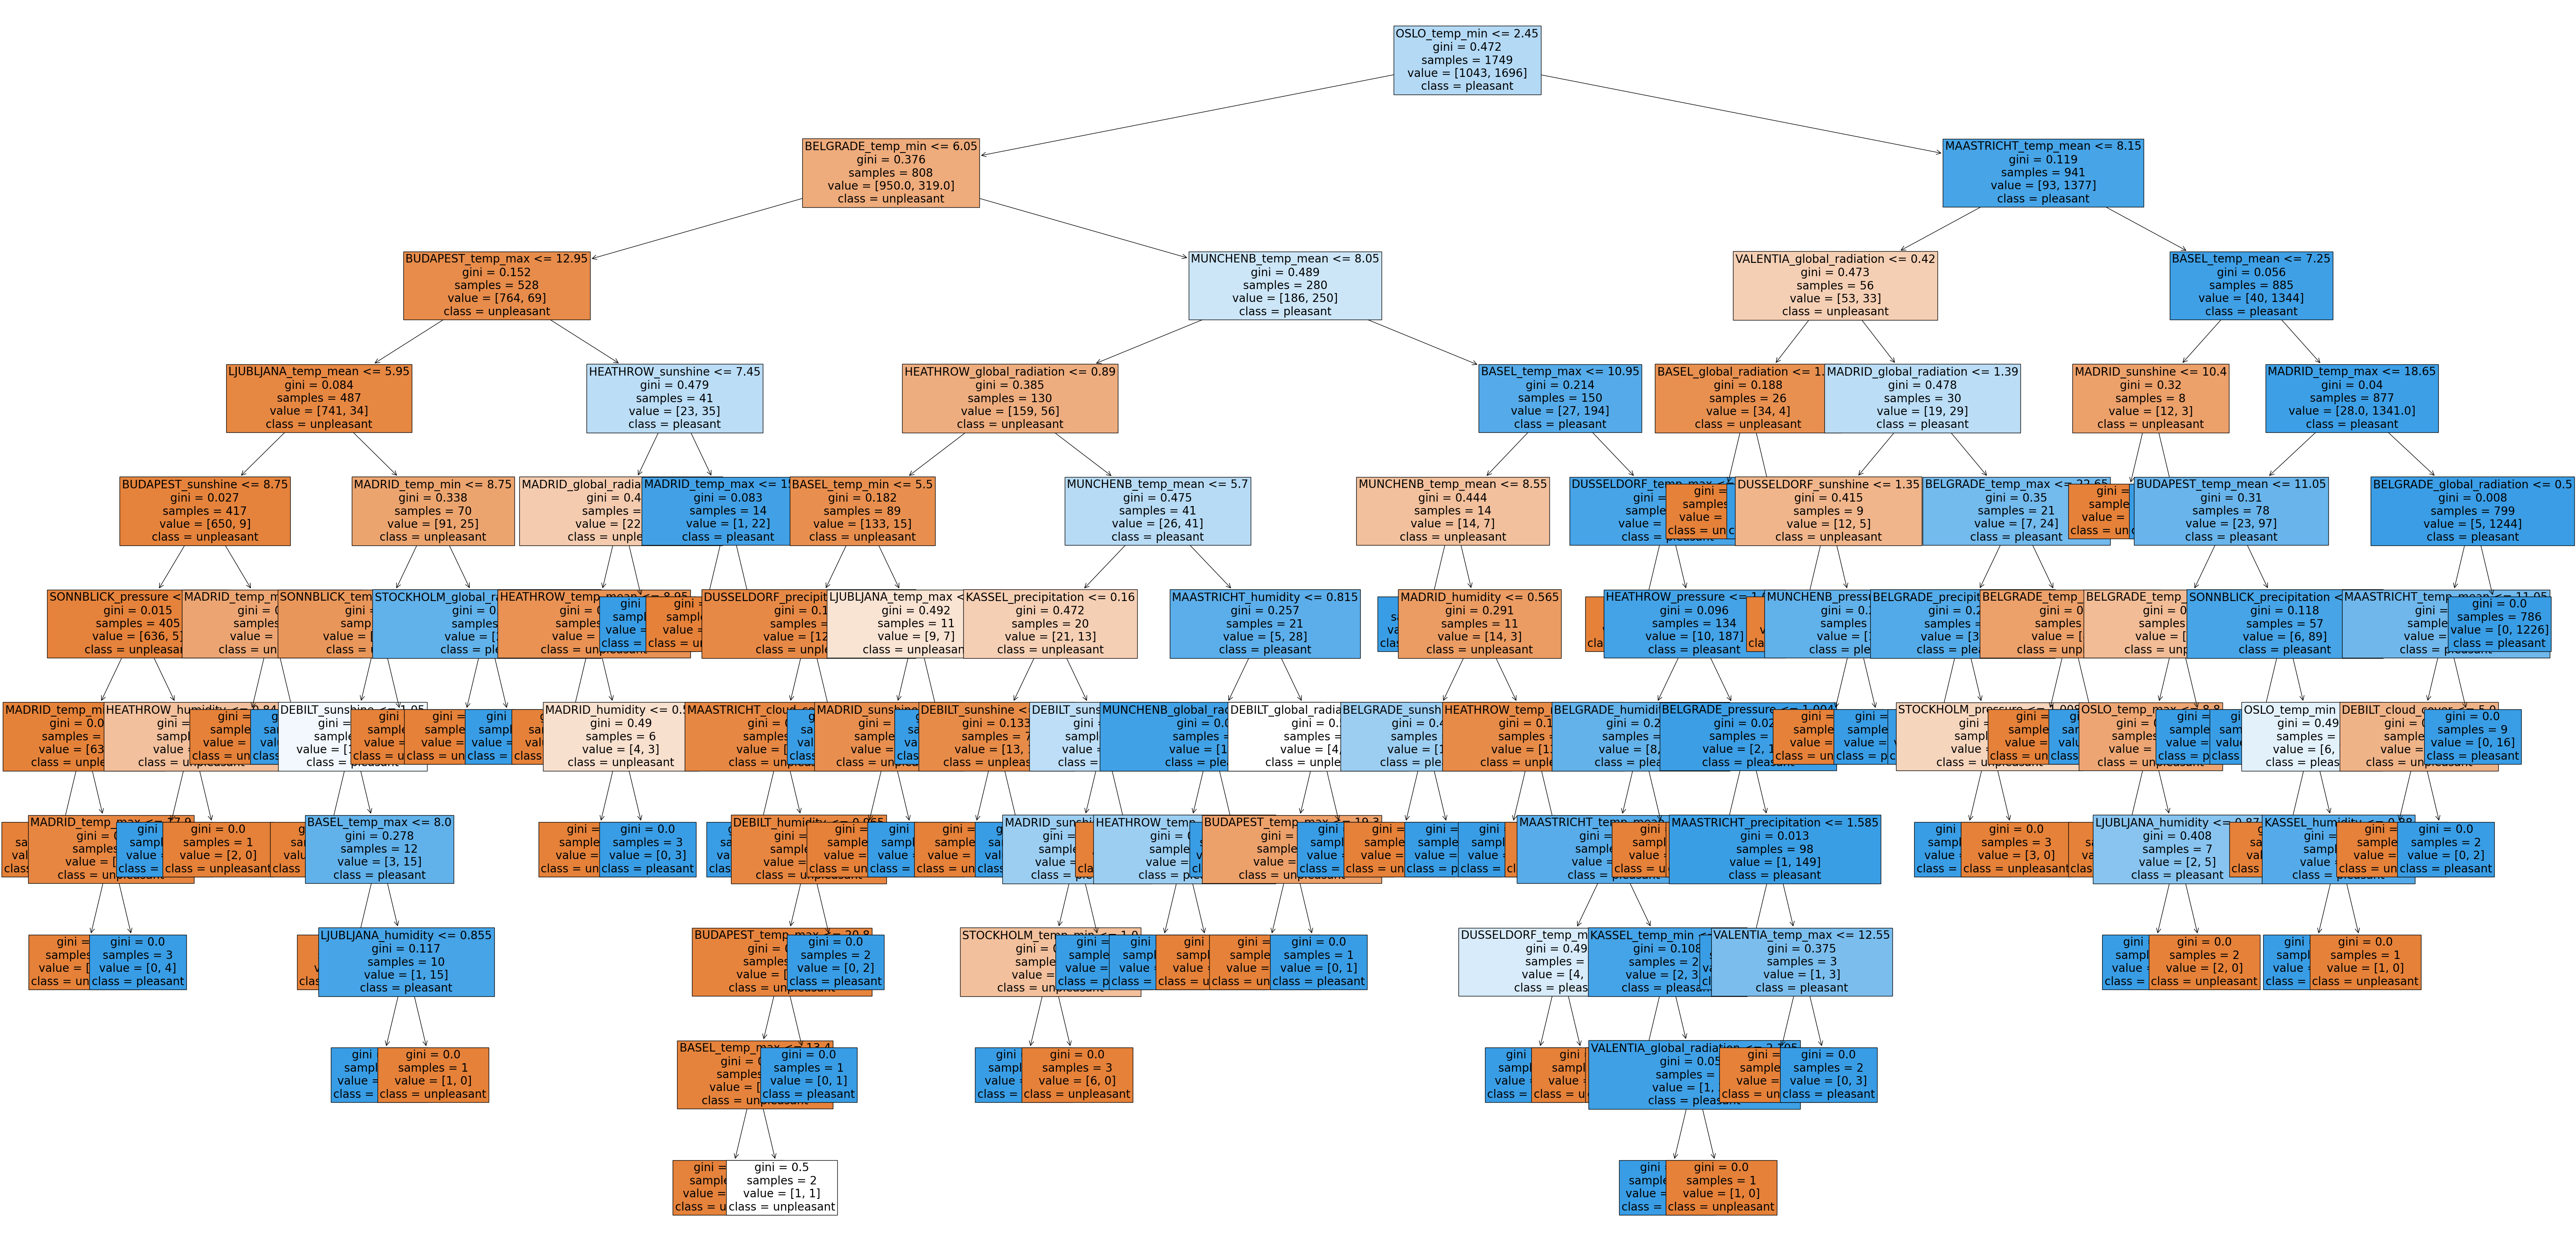

In [52]:
# Plot random forest (2010s)
rf_2 = plt.figure(figsize=(80,40))
plot_tree(clf_2.estimators_[5], fontsize = 20, feature_names=df_2010s.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [53]:
rf_2.savefig(os.path.join(path,'Visualization', 'RF_2010s.png'))

## Bar Chart- Influence

## 2000s dataset

In [56]:
# Retrieve feature importances from the trained model
feature_importances_1 = clf_1.feature_importances_
print("Feature Importances:", feature_importances_1)
print(feature_importances_1.shape)

Feature Importances: [0.00049362 0.00138055 0.00131328 0.00254207 0.00104325 0.00108798
 0.04703489 0.00291777 0.03534443 0.00086038 0.00270339 0.00127646
 0.01446798 0.00199886 0.00199385 0.01313015 0.00375754 0.03097517
 0.00047855 0.00145696 0.0013561  0.00763634 0.00107189 0.00201035
 0.07095201 0.02307823 0.04842075 0.00045031 0.00095342 0.00089774
 0.00562227 0.00066131 0.00122899 0.00734889 0.00182687 0.02497789
 0.00044765 0.00112721 0.00102697 0.00677406 0.00090928 0.00103378
 0.01439103 0.00147399 0.00873939 0.00046151 0.00126432 0.00123033
 0.00315801 0.00049428 0.00078162 0.00442277 0.00224283 0.00069452
 0.01493131 0.00084833 0.00115309 0.00218453 0.00080769 0.00099034
 0.01070444 0.00192768 0.02207795 0.00046672 0.00172513 0.00125142
 0.00256249 0.00093751 0.0011573  0.05733907 0.00688919 0.04292649
 0.00066469 0.00107516 0.00098066 0.00606448 0.00053344 0.00091442
 0.00751982 0.00130614 0.01421195 0.0010651  0.00405576 0.00204409
 0.0075001  0.00203661 0.00349224 0.08982

In [57]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_1 = feature_importances_1.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_1.shape)

Reshaped Importances Shape: (1, 15, 9)


In [58]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_1 = np.sum(reshaped_importances_1[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_1.shape)
print("Collapsed Importances:", collapsed_importances_1)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.09315784 0.07116378 0.15646118 0.04396769 0.03592338 0.0147502
 0.05562535 0.11525534 0.03327075 0.21670874 0.07610269 0.02761177
 0.01097966 0.03255494 0.01646669]


In [59]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [60]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_1 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_1
})

In [61]:
# Sort by importance for chart readability
collapsed_importances_df_1 = collapsed_importances_df_1.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_1)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.216709
2         BUDAPEST    0.156461
7        LJUBLJANA    0.115255
0            BASEL    0.093158
10        MUNCHENB    0.076103
1         BELGRADE    0.071164
6           KASSEL    0.055625
3           DEBILT    0.043968
4       DUSSELDORF    0.035923
8       MAASTRICHT    0.033271
13       STOCKHOLM    0.032555
11            OSLO    0.027612
14        VALENTIA    0.016467
5         HEATHROW    0.014750
12       SONNBLICK    0.010980


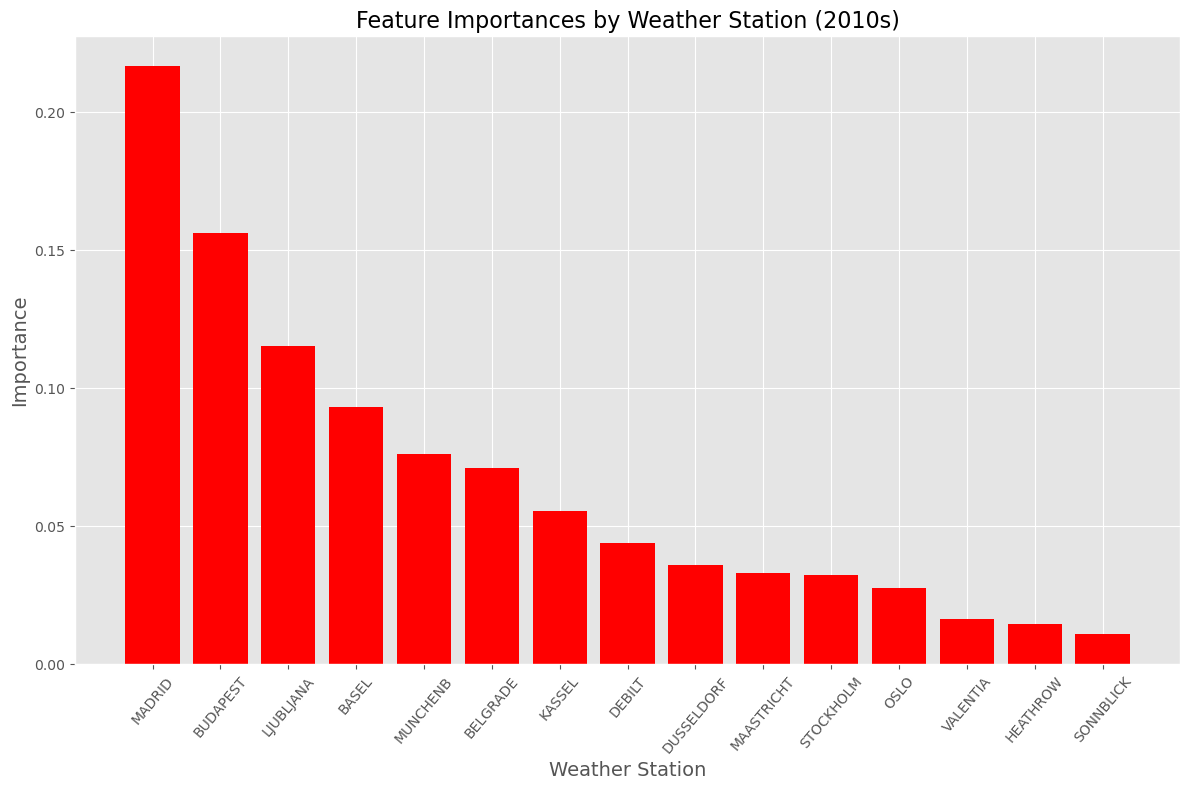

In [62]:
# Plot the importances

plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_1['Weather Station'], collapsed_importances_df_1['Importance'], color='red')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2010s)', fontsize=16)
plt.tight_layout()
plt.show()

In [63]:
plt_1.savefig(os.path.join(path,'Visualization', 'Influence_2000s.png'))

## 2010s dataset

In [65]:
# Retrieve feature importances from the trained model
feature_importances_2 = clf_2.feature_importances_
print("Feature Importances:", feature_importances_2)

Feature Importances: [6.93239466e-04 1.06828469e-03 1.24509869e-03 1.96893878e-03
 6.92254508e-04 9.44947524e-04 5.27418621e-02 2.31600165e-03
 2.12466051e-02 1.22628819e-03 1.39340228e-03 2.54076543e-03
 1.25778391e-03 2.29369662e-03 3.83663643e-03 1.27477897e-02
 3.31613956e-03 3.30240662e-02 3.90914210e-04 0.00000000e+00
 0.00000000e+00 9.24724065e-04 8.17864470e-04 9.43232618e-04
 3.58338957e-02 3.83657576e-03 6.73731581e-02 3.11076157e-04
 6.41708056e-04 9.52370306e-04 2.93644411e-03 7.52026047e-04
 1.20599848e-03 3.76217679e-03 1.47595412e-03 2.56581216e-02
 6.38689081e-04 9.29315339e-04 8.81713996e-04 1.67946402e-03
 6.79936682e-04 6.96796319e-04 1.62772083e-02 1.05921600e-03
 1.98449582e-02 3.79377831e-04 1.12560308e-03 1.32525259e-03
 9.00596326e-03 7.88465925e-04 1.48616042e-03 2.66136578e-02
 1.02317597e-03 5.31219805e-04 1.09906469e-02 7.13493123e-04
 8.73903839e-04 6.84006705e-04 2.44214660e-04 3.64793751e-04
 5.25170983e-04 7.83916911e-04 1.56485485e-03 5.08451130e-04
 1.

In [66]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_2 = feature_importances_2.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_2.shape)

Reshaped Importances Shape: (1, 15, 9)


In [67]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_2 = np.sum(reshaped_importances_2[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_2.shape)
print("Collapsed Importances:", collapsed_importances_2)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.08291723 0.06163657 0.11012036 0.03769588 0.0426873  0.04227888
 0.016745   0.13451347 0.06289185 0.21767718 0.06922151 0.05367441
 0.01921564 0.04402019 0.00470453]


In [68]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_2 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_2
})

In [69]:
# Sort by importance for chart readability
collapsed_importances_df_2 = collapsed_importances_df_2.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_2)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.217677
7        LJUBLJANA    0.134513
2         BUDAPEST    0.110120
0            BASEL    0.082917
10        MUNCHENB    0.069222
8       MAASTRICHT    0.062892
1         BELGRADE    0.061637
11            OSLO    0.053674
13       STOCKHOLM    0.044020
4       DUSSELDORF    0.042687
5         HEATHROW    0.042279
3           DEBILT    0.037696
12       SONNBLICK    0.019216
6           KASSEL    0.016745
14        VALENTIA    0.004705


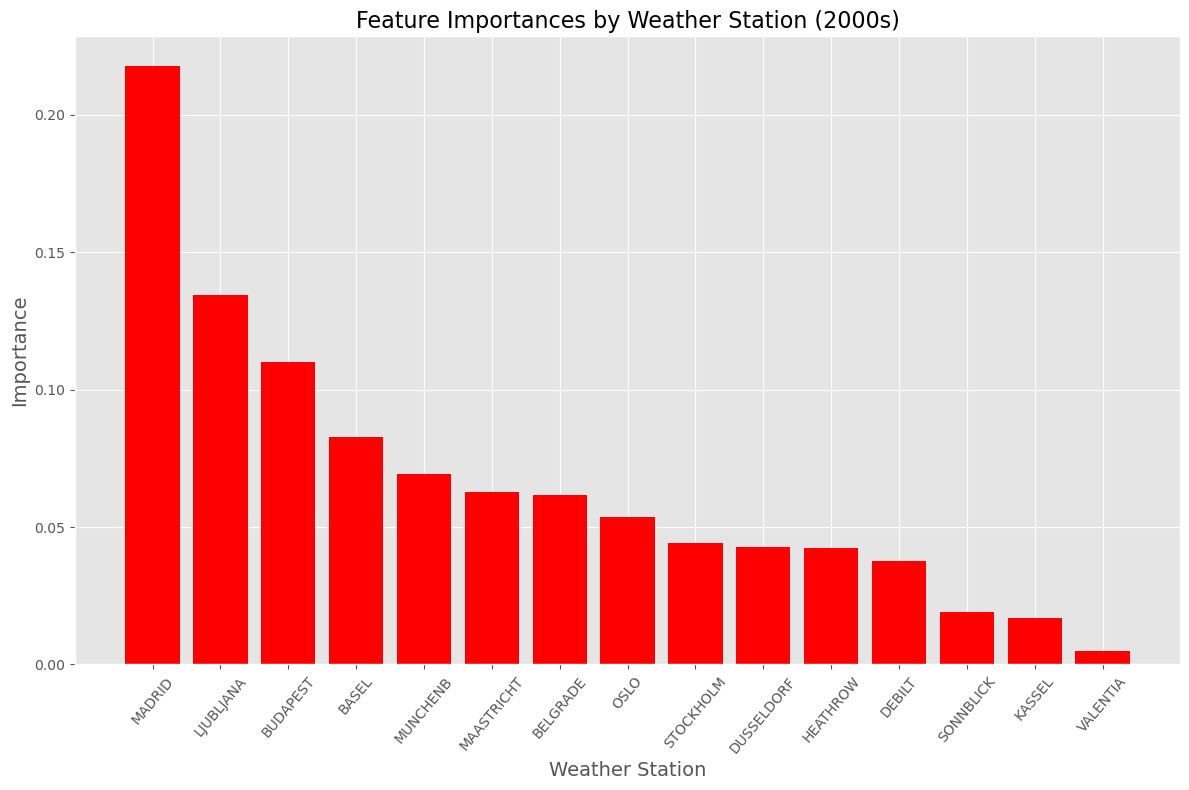

In [70]:
# Plot the importances

plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_2['Weather Station'], collapsed_importances_df_2['Importance'], color='red')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2000s)', fontsize=16)
plt.tight_layout()
plt.show()

In [71]:
plt_2.savefig(os.path.join(path,'Visualization', 'Influence_2010s.png'))

## 3 most Influential stations

## Madrid

### Pre-processing

In [75]:
# Filter weather dataset to only include Madrid
df_mad = df_weather[df_weather.columns[df_weather.columns.astype(str).str.startswith('MADRID')]]

# Check output
df_mad.head()

MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
0                   6             0.92           1.0260   
1                   7             0.86           1.0254   
2                   5             0.90           1.0287   
3                   0             0.75           1.0281   
4                   2             0.64           1.0269   

   MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
0                     0.53                   0.0              1.4   
1                     0.46                   0.0              0.9   
2                     0.63                   0.0              2.3   
3                     1.16                   0.0              8.7   
4                     1.10                   0.0              7.8   

   MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
0               7.6              4.4             10.8  
1               9.8              7.4             12.2  
2               8.6              6.4             10.8  
3              10.3              4.5             16.1  
4              12.1              8.2             16.0

In [76]:
# Filter pleasant dataset to only include Madrid
mad_pleasant = df_pleasant[df_pleasant.columns[df_pleasant.columns.astype(str).str.startswith('MADRID')]]

# Check output
mad_pleasant.head()

MADRID_pleasant_weather
0                        0
1                        0
2                        0
3                        0
4                        0

In [77]:
# Check shape
print(df_mad.shape)
print(mad_pleasant.shape)

(22950, 9)
(22950, 1)


In [78]:
# Create matrices
y_3 = mad_pleasant.max(axis=1)

# Check shape
print("Shape of y_3_combined:", y_3.shape)

Shape of y_3_combined: (22950,)


In [79]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_3_combined:", y_3.unique())

Unique values in y_3_combined: [0 1]


In [80]:
# Ensure y has the correct shape
y_3 = y_3.to_numpy().reshape(-1)

# Check shape
print(y_3.shape)

(22950,)


In [81]:
# Create X matrix
X_3 = df_mad.to_numpy()

# Check shapes of the matrices
print(X_3.shape)
print(y_3.shape)

(22950, 9)
(22950,)


In [82]:
# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=127)

# Check shapes
print(X_train_3.shape, y_train_3.shape)
print(X_test_3.shape, y_test_3.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### Random forest

In [84]:
# Creating a Random Forest classifier
clf_3 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_3.fit(X_train_3, y_train_3)

RandomForestClassifier(max_depth=3)

In [85]:
# Perform the predictions on the test dataset
y_pred_3 = clf_3.predict(X_test_3)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_3, y_pred_3))

Model Accuracy:  0.9958173579644476


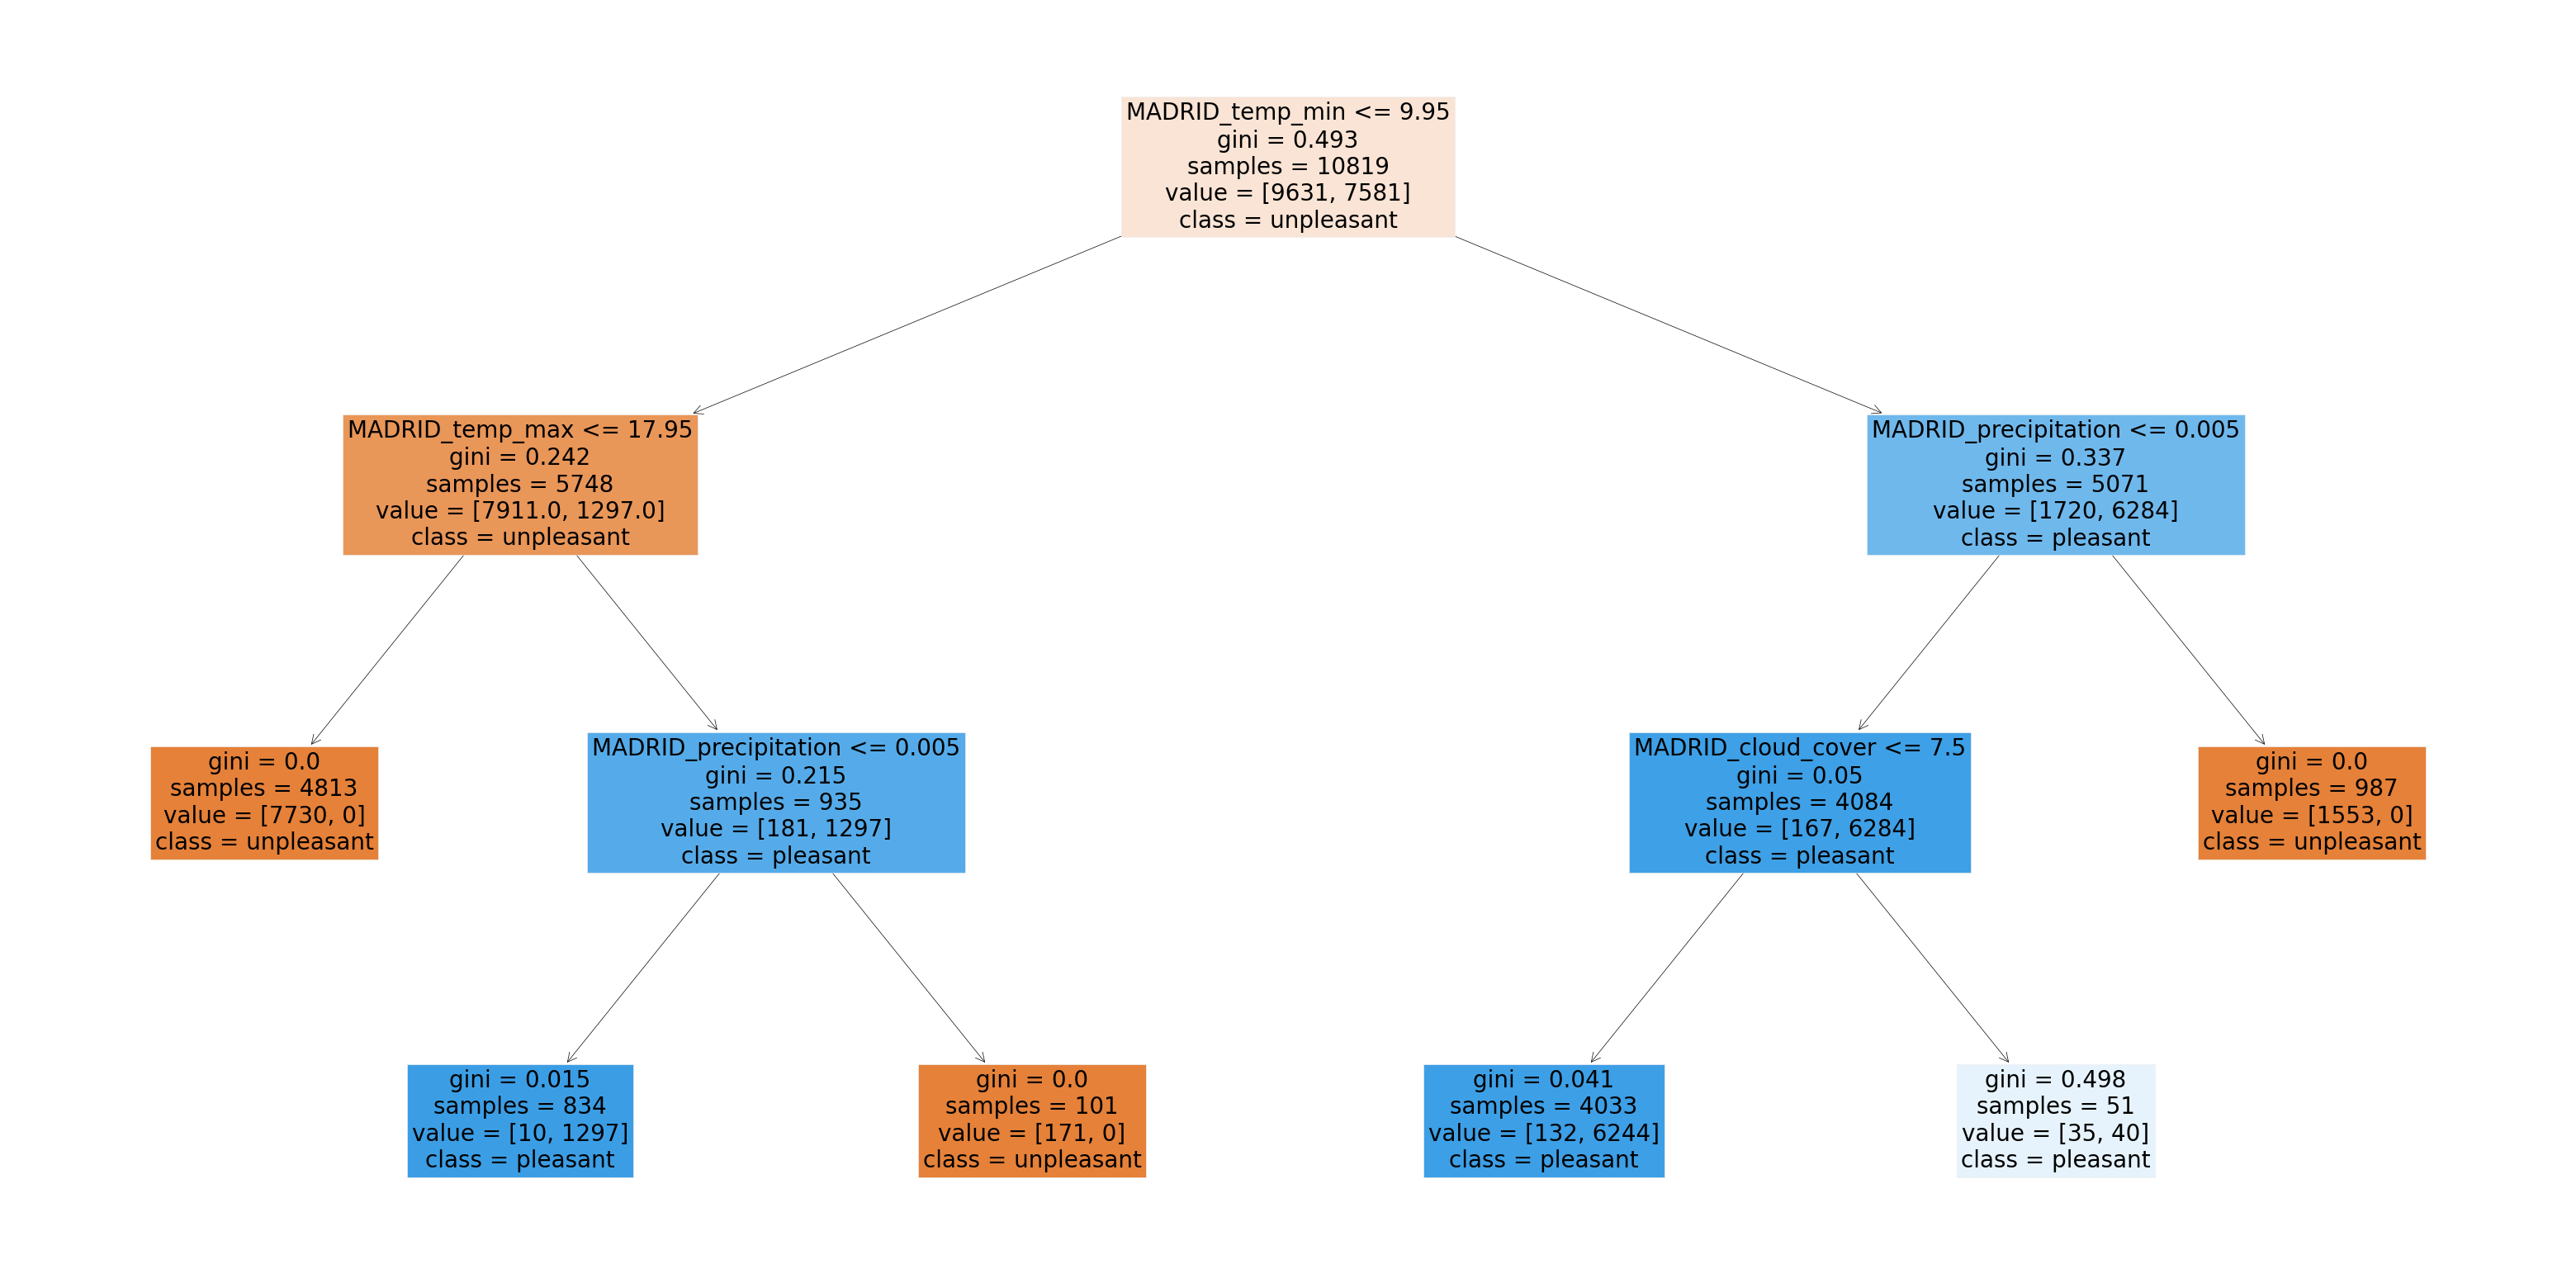

In [86]:
# Plot random forest (Madrid)
rf_3 = plt.figure(figsize=(40,20))
plot_tree(clf_3.estimators_[5], fontsize = 20, feature_names=df_mad.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [87]:
rf_3.savefig(os.path.join(path,'Visualization', 'RF_Madrid.png'))

### Bar chart- Parameter influence

In [89]:
# Retrieve feature importances from the trained model
feature_importances_3 = clf_3.feature_importances_
print("Feature Importances:", feature_importances_3)
print(feature_importances_3.shape)

Feature Importances: [0.028053   0.01149491 0.00047987 0.08661986 0.14080922 0.06931484
 0.16803824 0.09708373 0.39810632]
(9,)


In [90]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [91]:
# Create a dataframe to associate observation measurements with their importances
importances_df_3 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_3
})

In [92]:
# Sort by importance for chart readability
importances_df_3 = importances_df_3.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_3)

Feature Importance:
        Measurement  Importance
8          temp_max    0.398106
6         temp_mean    0.168038
4     precipitation    0.140809
7          temp_min    0.097084
3  global_radiation    0.086620
5          sunshine    0.069315
0       cloud_cover    0.028053
1          humidity    0.011495
2          pressure    0.000480


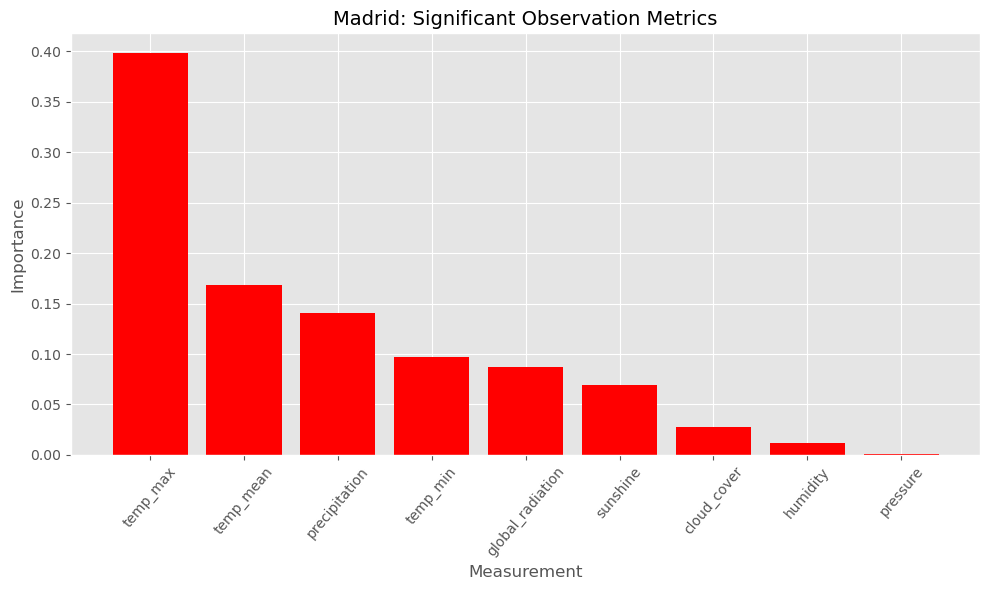

In [93]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_3['Measurement'], importances_df_3['Importance'], color='red')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()

### The most important parameters for weather prediction in Madrid are temp_max, precipitation and temp_mean

In [95]:
plt_3.savefig(os.path.join(path,'Visualization', 'Influence_Madrid.png'))

## Budapest

### Pre-processing

In [98]:
# Filter weather dataset to only include Budapest
df_bud = df_weather[df_weather.columns[df_weather.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
df_bud.head()

BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   
1                     4               0.67              1.017   
2                     4               0.67              1.017   
3                     4               0.67              1.017   
4                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   
1                       0.18                    0.31                0.0   
2                       0.30                    0.00                0.6   
3                       0.19                    0.00                0.0   
4                       0.19                    0.00                0.0   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  
0                 2.4               -0.4                5.1  
1                 2.3                1.4                3.1  
2                 2.7                1.7                5.3  
3                 2.0                0.4                4.4  
4                 2.5                1.1                5.3

In [99]:
# Filter pleasant dataset to only include Budapest
bud_pleasant = df_pleasant[df_pleasant.columns[df_pleasant.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
bud_pleasant.head()

BUDAPEST_pleasant_weather
0                          0
1                          0
2                          0
3                          0
4                          0

In [100]:
# Check shape
print(df_bud.shape)
print(bud_pleasant.shape)

(22950, 9)
(22950, 1)


In [101]:
# Create matrices
y_4 = bud_pleasant.max(axis=1)

# Check shape
print("Shape of y_4_combined:", y_4.shape)

Shape of y_4_combined: (22950,)


In [102]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_4_combined:", y_4.unique())

Unique values in y_4_combined: [0 1]


In [103]:
# Ensure y has the correct shape
y_4 = y_4.to_numpy().reshape(-1)

# Check shape
print(y_4.shape)

(22950,)


In [104]:
# Create X matrix
X_4 = df_bud.to_numpy()

# Check shapes of the matrices
print(X_4.shape)
print(y_4.shape)

(22950, 9)
(22950,)


In [105]:
# Split data into training and testing sets
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, random_state=127)

# Check shapes
print(X_train_4.shape, y_train_4.shape)
print(X_test_4.shape, y_test_4.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### Random Forest

In [107]:
# Creating a Random Forest classifier
clf_4 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_4.fit(X_train_4, y_train_4)

RandomForestClassifier(max_depth=3)

In [108]:
# Perform the predictions on the test dataset
y_pred_4 = clf_4.predict(X_test_4)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_4, y_pred_4))

Model Accuracy:  0.9959916347159289


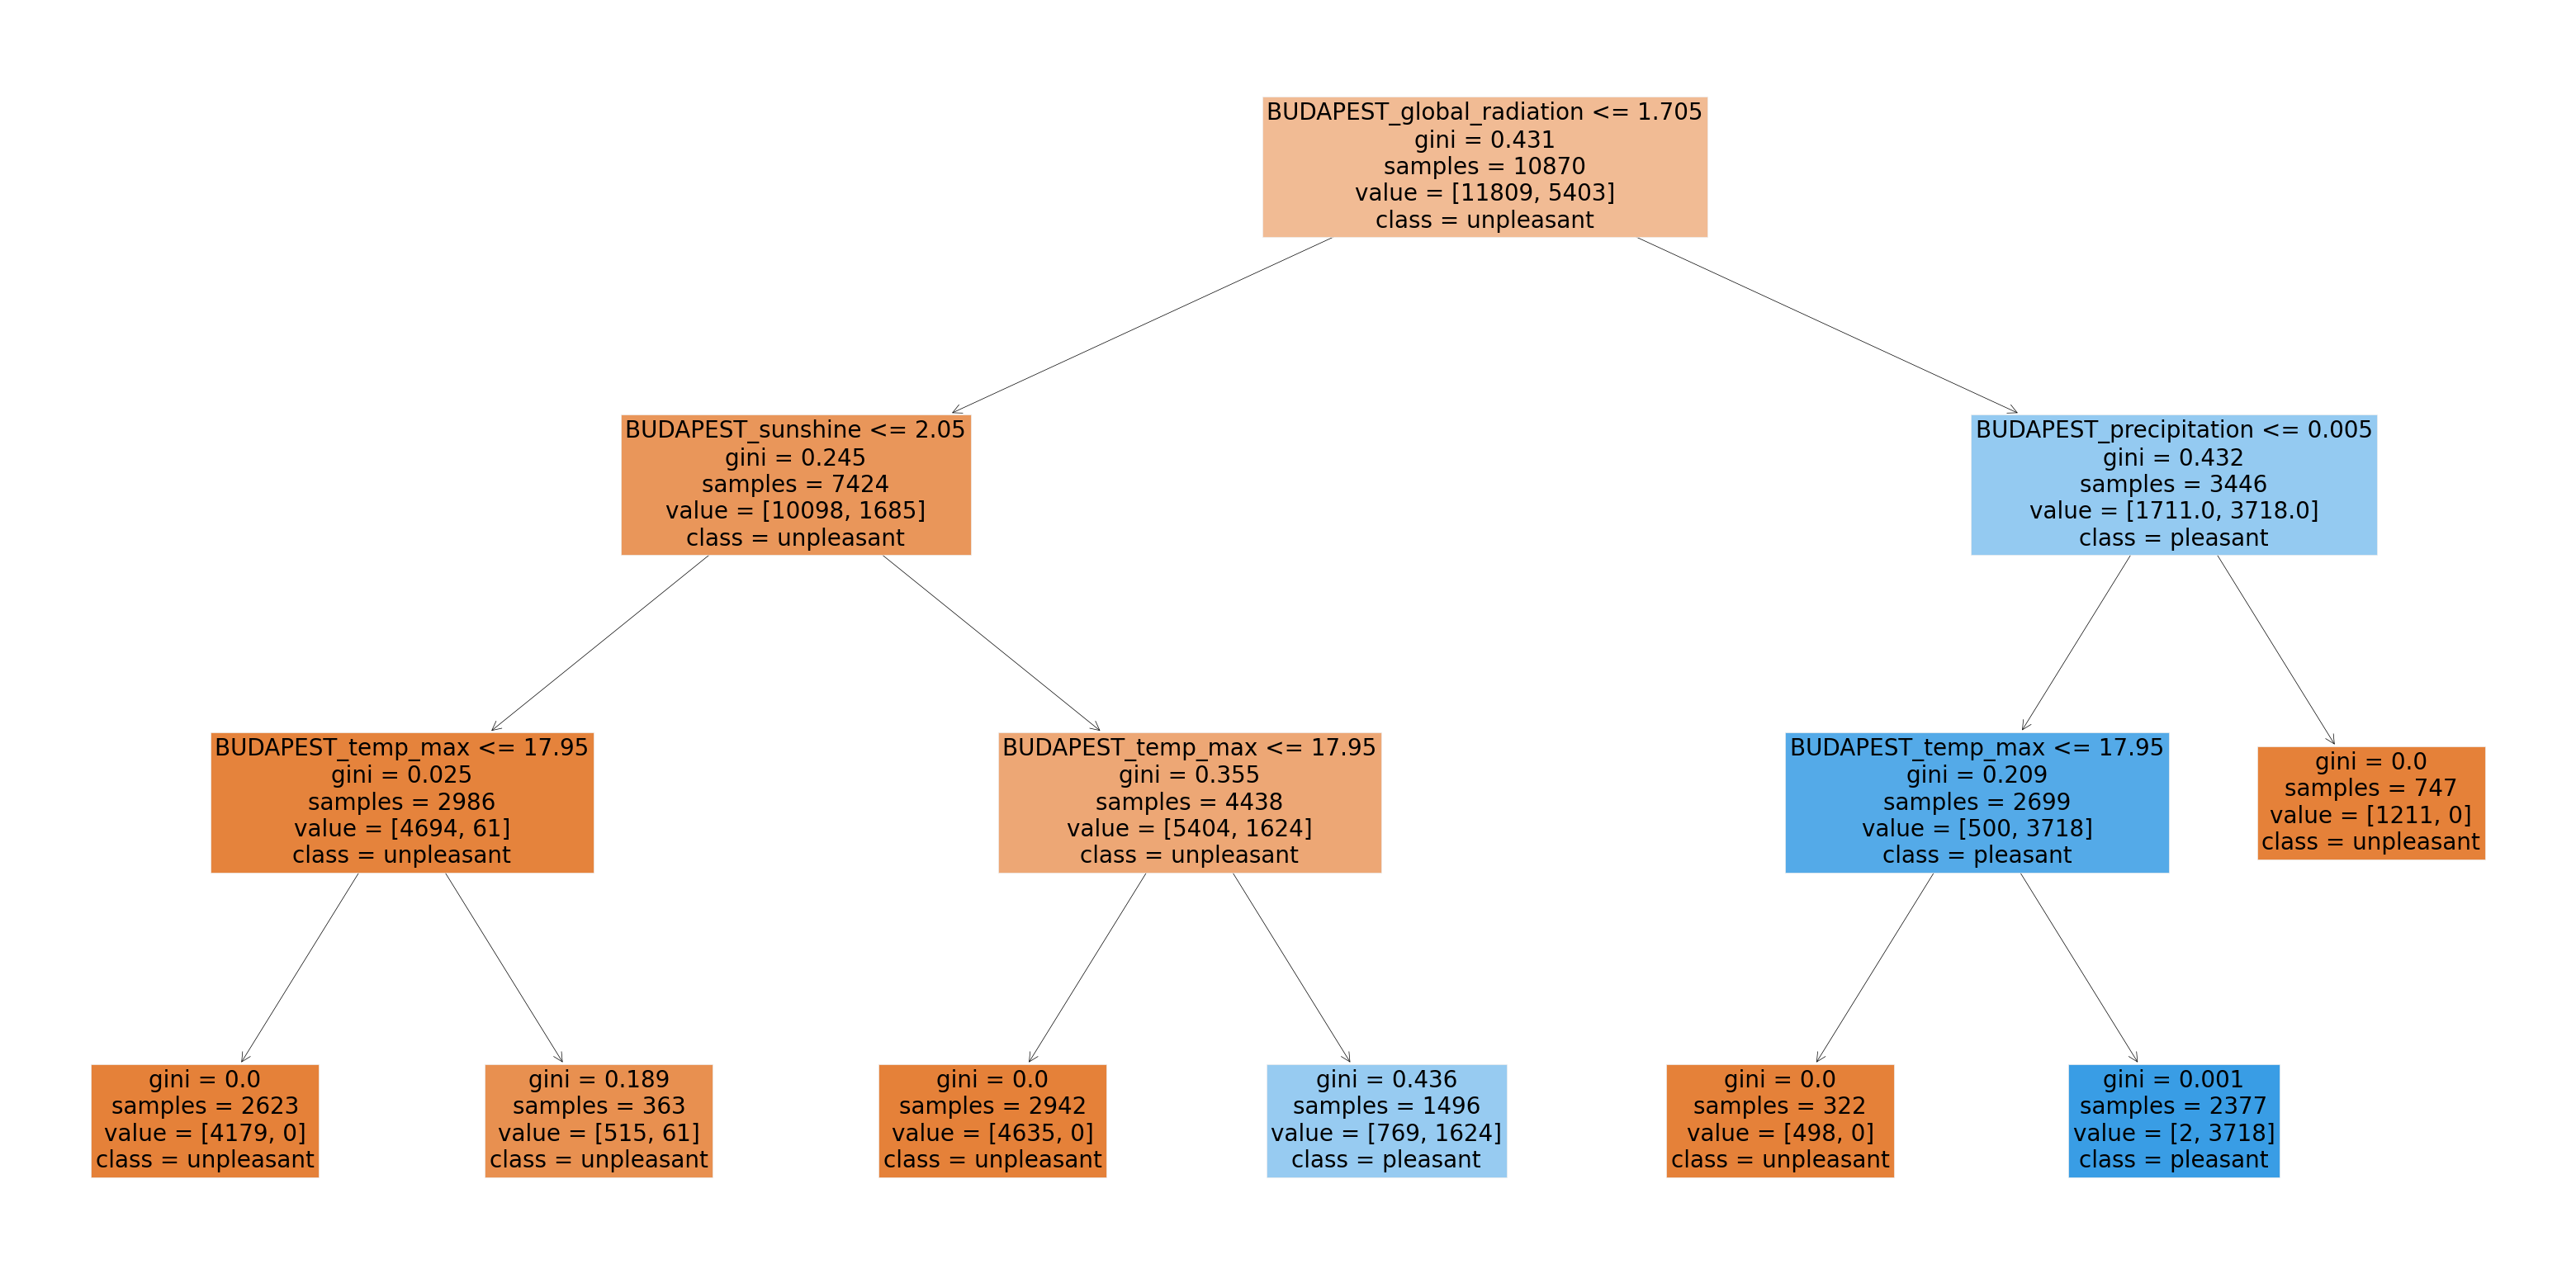

In [109]:
# Plot random forest (Budapest)
rf_4 = plt.figure(figsize=(40,20))
plot_tree(clf_4.estimators_[5], fontsize = 20, feature_names=df_bud.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [110]:
rf_4.savefig(os.path.join(path,'Visualization', 'RF_Budapest.png'))

### Bar chart- parameter influence

In [112]:
# Retrieve feature importances from the trained model
feature_importances_4 = clf_4.feature_importances_
print("Feature Importances:", feature_importances_4)
print(feature_importances_4.shape)

Feature Importances: [0.00953233 0.00852649 0.00188729 0.05619202 0.24915864 0.06563702
 0.20404876 0.11912591 0.28589152]
(9,)


In [113]:
# Create a dataframe to associate observation measurements with their importances
importances_df_4 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_4
})

In [114]:
# Sort by importance for chart readability
importances_df_4 = importances_df_4.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_4)

Feature Importance:
        Measurement  Importance
8          temp_max    0.285892
4     precipitation    0.249159
6         temp_mean    0.204049
7          temp_min    0.119126
5          sunshine    0.065637
3  global_radiation    0.056192
0       cloud_cover    0.009532
1          humidity    0.008526
2          pressure    0.001887


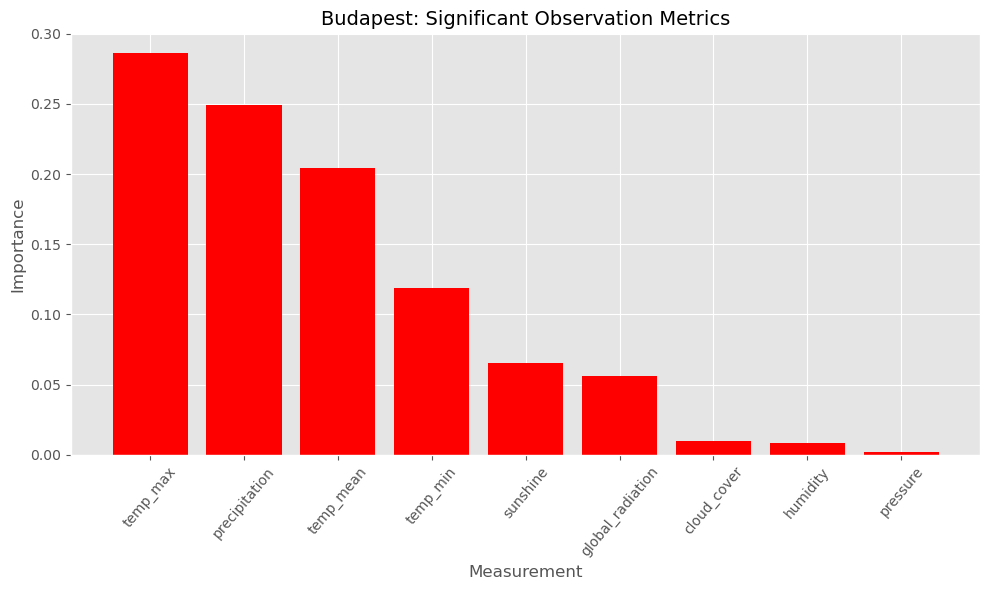

In [115]:
# Plot the importances

plt.style.use('ggplot')
plt_4 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_4['Measurement'], importances_df_4['Importance'], color='red')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Budapest: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()

### The most important parameters for weather prediction in Budapest are temp_max, precipitation and temp_mean

In [117]:
plt_4.savefig(os.path.join(path,'Visualization', 'Influence_Budapest.png'))

## Ljubljana

### Pre-processing

In [120]:
# Filter weather dataset to only include Ljubljana
df_ljub = df_weather[df_weather.columns[df_weather.columns.astype(str).str.startswith('LJUBLJANA')]]

# Check output
df_ljub.head()

LJUBLJANA_cloud_cover  LJUBLJANA_humidity  LJUBLJANA_pressure  \
0                      8                1.00              1.0173   
1                      6                0.94              1.0173   
2                      8                0.96              1.0173   
3                      6                0.94              1.0173   
4                      7                0.94              1.0173   

   LJUBLJANA_global_radiation  LJUBLJANA_precipitation  LJUBLJANA_sunshine  \
0                        0.20                     0.00                 0.0   
1                        0.56                     0.13                 3.2   
2                        0.20                     0.12                 0.0   
3                        0.49                     0.00                 2.2   
4                        0.20                     0.00                 0.0   

   LJUBLJANA_temp_mean  LJUBLJANA_temp_min  LJUBLJANA_temp_max  
0                 -0.6                -1.9                 0.5  
1                  2.1                -1.3                 5.5  
2                  4.6                 0.9                 6.3  
3                  3.2                 1.0                 7.0  
4                  3.6                 0.4                 4.8

In [121]:
# Filter pleasant dataset to only include Ljubljana
ljub_pleasant = df_pleasant[df_pleasant.columns[df_pleasant.columns.astype(str).str.startswith('LJUBLJANA')]]

# Check output
ljub_pleasant.head()

LJUBLJANA_pleasant_weather
0                           0
1                           0
2                           0
3                           0
4                           0

In [122]:
# Check shape
print(df_ljub.shape)
print(ljub_pleasant.shape)

(22950, 9)
(22950, 1)


In [123]:
# Create matrices
y_5 = ljub_pleasant.max(axis=1)

# Check shape
print("Shape of y_5_combined:", y_5.shape)

Shape of y_5_combined: (22950,)


In [124]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_5_combined:", y_5.unique())

Unique values in y_5_combined: [0 1]


In [125]:
# Ensure y has the correct shape
y_5 = y_5.to_numpy().reshape(-1)

# Check shape
print(y_5.shape)

(22950,)


In [126]:
# Create X matrix
X_5 = df_ljub.to_numpy()

# Check shapes of the matrices
print(X_5.shape)
print(y_5.shape)

(22950, 9)
(22950,)


In [127]:
# Split data into training and testing sets
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, random_state=127)

# Check shapes
print(X_train_5.shape, y_train_5.shape)
print(X_test_5.shape, y_test_5.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### Random forest

In [129]:
# Creating a Random Forest classifier
clf_5 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_5.fit(X_train_5, y_train_5)

RandomForestClassifier(max_depth=3)

In [130]:
# Perform the predictions on the test dataset
y_pred_5 = clf_5.predict(X_test_5)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_5, y_pred_5))

Model Accuracy:  0.9975601254792611


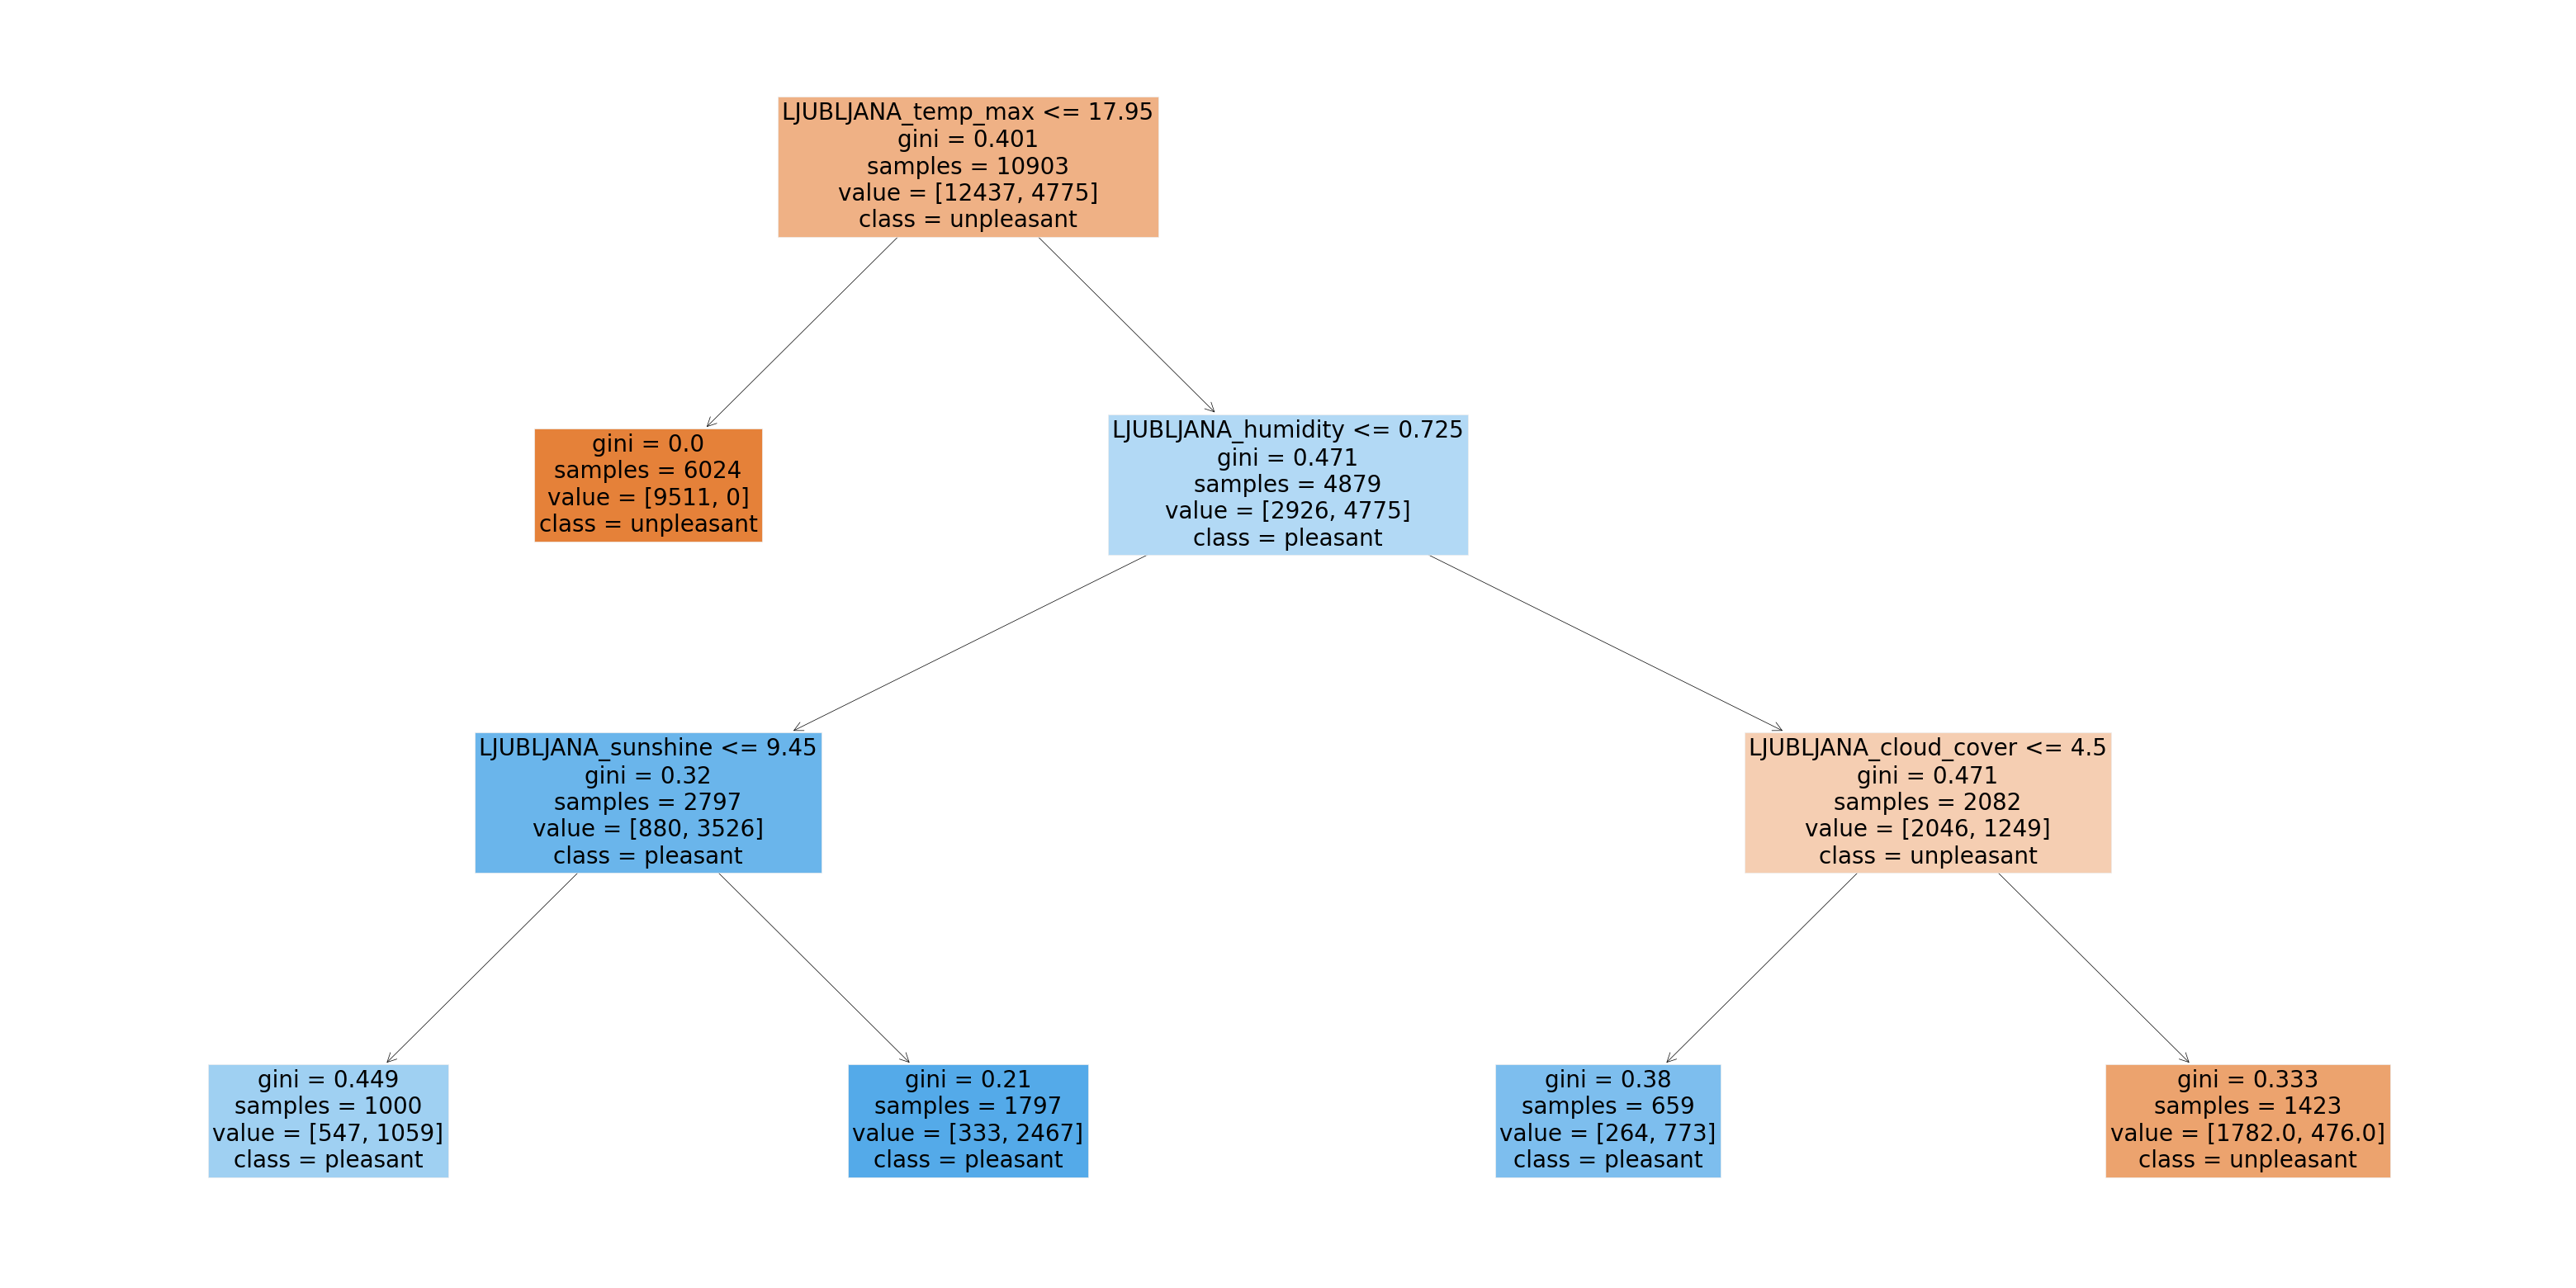

In [131]:
# Plot random forest (MunchenB)
rf_5 = plt.figure(figsize=(40,20))
plot_tree(clf_5.estimators_[5], fontsize = 20, feature_names=df_ljub.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [132]:
rf_5.savefig(os.path.join(path,'Visualization', 'RF_Llubljana.png'))

### Bar chart- Parameter influence

In [134]:
# Retrieve feature importances from the trained model
feature_importances_5 = clf_5.feature_importances_
print("Feature Importances:", feature_importances_5)
print(feature_importances_5.shape)

Feature Importances: [0.04266764 0.01682732 0.00377041 0.15996509 0.23800436 0.15705078
 0.11222039 0.01365821 0.25583581]
(9,)


In [135]:
# Create a dataframe to associate observation measurements with their importances
importances_df_5 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_5
})

In [136]:
# Sort by importance for chart readability
importances_df_5= importances_df_5.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_5)

Feature Importance:
        Measurement  Importance
8          temp_max    0.255836
4     precipitation    0.238004
3  global_radiation    0.159965
5          sunshine    0.157051
6         temp_mean    0.112220
0       cloud_cover    0.042668
1          humidity    0.016827
7          temp_min    0.013658
2          pressure    0.003770


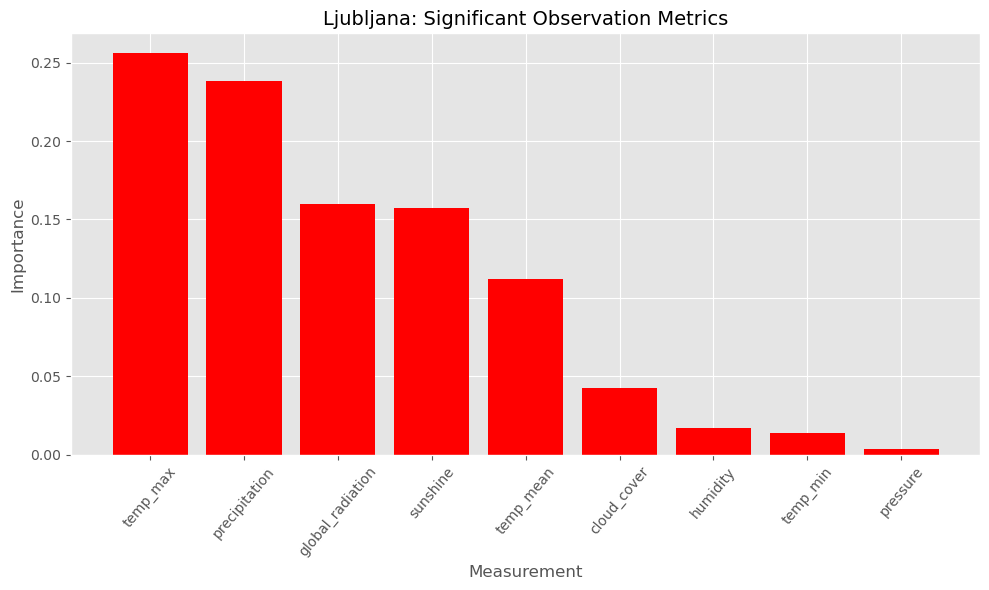

In [137]:
# Plot the importances

plt.style.use('ggplot')
plt_5 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_5['Measurement'], importances_df_5['Importance'], color='red')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Ljubljana: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()

### The most important parameters for weather prediction in Llubljana are temp_max, precipitation and global_radiation

In [139]:
plt_5.savefig(os.path.join(path,'Visualization', 'Influence_Llubljana.png'))

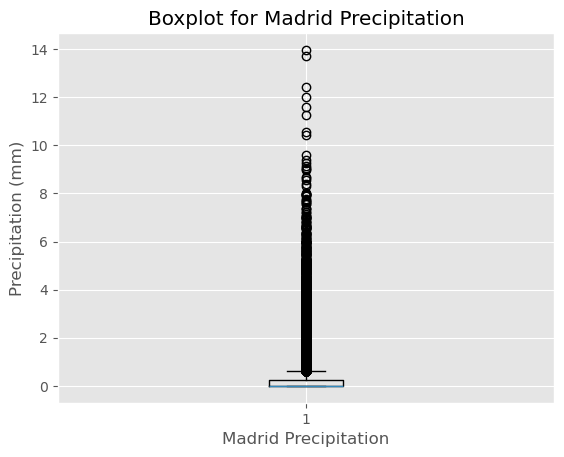

In [140]:
plt.boxplot(df_ljub['LJUBLJANA_precipitation'])
plt.title('Boxplot for Madrid Precipitation')
plt.xlabel('Madrid Precipitation')
plt.ylabel('Precipitation (mm)')
plt.grid(True)  # Optional: Add a grid for better readability
plt.show()

In [141]:
from scipy import stats

z_scores = stats.zscore(df_weather)
z_scores


DATE     MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0     -1.707663 -1.599964           0.660514        0.826097       -0.001949   
1     -1.707657 -1.599964           0.244897        0.735760       -0.001949   
2     -1.707652 -1.599964           1.076130        1.277781       -0.001949   
3     -1.707646 -1.599964          -1.001953        1.458455       -0.001949   
4     -1.707641 -1.599964           0.244897        1.729466       -0.001949   
...         ...       ...                ...             ...             ...   
22945  1.715693  1.013583          -1.833187        0.284075        1.037367   
22946  1.715699  1.013583           0.244897        0.103401        0.976231   
22947  1.715704  1.013583          -0.586336        0.013064        0.716402   
22948  1.715710  1.013583          -0.170720        0.374412        0.487141   
22949  1.715715  1.013583          -0.170720        0.735760        0.196744   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                   -1.101066            -0.265148       -0.902918   
1                   -1.058108             1.658760       -0.810126   
2                   -1.251420             0.155707       -1.065304   
3                   -0.821838            -0.445514       -0.114186   
4                   -0.746661            -0.164944        0.187388   
...                       ...                  ...             ...   
22945               -0.005632            -0.004619        0.720943   
22946               -0.005632            -0.004619        0.187388   
22947               -0.005632            -0.004619        0.349774   
22948               -0.005632            -0.004619        0.280180   
22949               -0.005632            -0.004619       -0.322968   

       BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
0            -0.528623       -0.845652  ...           -0.639538   
1            -0.582946       -0.462450  ...           -0.628550   
2            -0.257010       -0.186545  ...           -0.727444   
3            -0.555784       -0.385810  ...           -0.925231   
4            -1.003946       -1.075573  ...           -0.705467   
...                ...             ...  ...                 ...   
22945         0.747959        0.779123  ...            0.382364   
22946         0.856604        1.223637  ...            0.393353   
22947         0.856604        1.039701  ...            0.404341   
22948         0.680055        0.809780  ...            0.184577   
22949         0.422023        0.549202  ...            0.206553   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                 -0.443701           0.761754          -1.299744   
1                  0.783085           1.183580          -1.262455   
2                  0.783085           1.183580          -0.432779   
3                  0.783085           0.480538           0.387574   
4                 -1.670486          -0.363113           1.729970   
...                     ...                ...                ...   
22945             -0.443701          -0.081896          -0.003958   
22946             -0.443701          -0.081896          -0.003958   
22947             -0.443701          -0.081896          -0.003958   
22948             -0.443701          -0.081896          -0.003958   
22949             -0.443701          -0.081896          -0.003958   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                      -0.806427               -0.088407           0.372147   
1                      -1.042055                0.503361          -0.829285   
2                      -1.136306               -0.396127          -1.009500   
3                      -1.183432                0.669056          -1.039536   
4                      -0.794645               -0.490810           0.672505   
...                          ...                     ...                ...   
22945                 